# QCTO - Workplace Module

## Mastering Avocado Pricing: A Strategic Approach to Regional, Seasonal, and Predictive Insights
#### Done By: Keneilwe Rangwaga
#### Deliverables
* [Github](https://github.com/keneilweRangw/my_project)
* [Trello](https://trello.com/invite/b/66c4d820321f790837357797/ATTI12e5e3913d28c20a257a01f8225ac0c5B364206D/capstoneprojectkrangwaga)

© ExploreAI 2024
<p align="center">
  <img src="https://plantsvibe.com/wp-content/uploads/2024/05/avocado-tree-growth-phases.jpg" alt="Navigating Avocado Pricing" width="600">
</p>

---

<a id="toc"></a>
## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Model Tuning and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>


---
<a id="BC"></a>
## **Background Context**
<a href=#toc>Back to Table of Contents</a>

**Introduction:**

Avocados have become more than just a trendy fruit; they represent a dynamic and rapidly evolving market within the global produce industry. From guacamole at the dinner table to avocado toast on breakfast menus worldwide, the demand for avocados has surged over the past decade. However, this popularity has introduced complexities in the avocado market, particularly concerning pricing and sales volume. Various factors, including regional demand, seasonality, and market dynamics, have significantly impacted how avocados are priced and sold across different regions and times of the year.

To better understand these complexities, this project aims to dissect the intricate patterns of avocado pricing and sales from 2015 to 2023, provided by the Hass Avocado Board. By exploring the interplay between geography, seasonality, and economic factors, the project aims to reveal the underlying trends and patterns that influence avocado pricing and sales. The insights gained will be crucial for stakeholders in the avocado industry to optimize their pricing strategies, forecast market trends, and enhance the overall efficiency of the supply chain.

Problem Statement:

Avocado pricing and sales are influenced by a complex interplay of regional differences, seasonal trends, and market dynamics. For stakeholders in the avocado industry, understanding these factors is critical to optimizing pricing strategies, forecasting future trends, and enhancing supply chain efficiency. This project seeks to address the challenge of accurately analyzing how geography, seasonality, and economic events have impacted avocado prices and sales volumes from 2015 to 2023.By developing predictive models and integrating these insights, this project aims to provide actionable recommendations that will enable better decision-making and strategic planning in the avocado market

---
<a id="one"></a>
## **Importing Package**
<a href=#toc>Back to Table of Contents</a>


* In this section, all the necessary Python packages will be listed and imported, which will be used throughout the project. These include:

Pandas for data manipulation.
Matplotlib and Seaborn for visualization.
scikit-learn for modeling and machine learning.
Other packages like NumPy, SciPy, and XGBoost may also be imported for additional functionality.
Here’s how you can import them:

---

In [4]:
import warnings
warnings.filterwarnings('ignore')# Ignore all warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import iplot
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ImportError: cannot import name '_moduleTNC' from partially initialized module 'scipy.optimize' (most likely due to a circular import) (c:\Users\patri\.conda\envs\sql-packages\Lib\site-packages\scipy\optimize\__init__.py)

---
<a id="two"></a>
## **Data Collection and Description**
<a href=#toc>Back to Table of Contents</a>

This data was initially downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The dataset tracks the sales of avocados across different regions, product types (conventional vs. organic), and over time. Here's how the Hass Avocado Board describes the data on their website:


The dataset represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
You can access the data [here](https://www.kaggle.com/datasets/vakhariapujan/avocado-prices-and-sales-volume-2015-2023/data) through kaggle.

The dataset contains 53,415 entries and 12 columns, with information on avocado prices, volumes, and regions from 2015 to 2023. Here’s a summary of the key details:
* Categorical
* Total Rows: 53,415
* Total Columns: 12

Columns Information:

1.	Date: The date of the observation (466 unique dates).
2.	AveragePrice: The average price of avocados.
3.	TotalVolume: The total volume of avocados sold.
4.	plu4046, plu4225, plu4770: Specific product look-up codes (PLU) representing different avocado products.

    4046 - small/medium Hass Avocados (~3-5 oz)

    4225 - large Hass Avocados (~8-10 oz)

    4770 - extra large Hass Avocados (~10-15 oz)
5.	TotalBags, SmallBags, LargeBags, XLargeBags: Number of avocados sold in different packaging types.

6.	Type: Indicates whether the avocado is “conventional” or “organic”.
7.	Region: Region of the sale (60 unique regions).


---
<a id="three"></a>
## **Loading Data**
<a href=#toc>Back to Table of Contents</a>

In this section, the data will be loaded into the notebook for manipulation and analysis.
- The code in the cell below is used to load the data/csv file and display the first few rows to give a sense of what the raw data looks like.
---

In [21]:
# Load the dataset
df = pd.read_csv('Avocado_HassAvocadoBoard_20152023v1.0.1.csv')

# Check the first few rows to understand the data
print(df.head())

         Date  AveragePrice  TotalVolume    plu4046    plu4225   plu4770  \
0  2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1  2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2  2015-01-04          1.00    435021.49  364302.39   23821.16     82.15   
3  2015-01-04          1.76      3846.69    1500.15     938.35      0.00   
4  2015-01-04          1.08    788025.06   53987.31  552906.04  39995.03   

   TotalBags  SmallBags  LargeBags  XLargeBags          type  \
0    9716.46    9186.93     529.53         0.0  conventional   
1    1162.65    1162.65       0.00         0.0       organic   
2   46815.79   16707.15   30108.64         0.0  conventional   
3    1408.19    1071.35     336.84         0.0       organic   
4  141136.68  137146.07    3990.61         0.0  conventional   

                region  
0               Albany  
1               Albany  
2              Atlanta  
3              Atlanta  
4  BaltimoreWashington  


---
<a id="four"></a>
## **Data Cleaning and Filtering**
<a href=#toc>Back to Table of Contents</a>


Data cleaning is the essential first step in any analysis, much like laying down a strong foundation before building a house. It’s about carefully going through your dataset to spot and fix any errors, inconsistencies, or gaps, making sure everything is accurate and relevant.
During this process, tasks like removing duplicates, fixing errors, and handling missing values are done. This helps to organize the data so the analysis gives clear and accurate results.

In short, data cleaning is crucial because it directly influences the quality of your analysis, ensuring that the insights you gain are reliable and actionable.

**Below are the steps will be explored to clean the dataset:**
1. Understanding the Data
2. Handling Missing Values
3. Date Column Formatting
4. Handling Inconsistent Data
5. Feature Engineering
6. Data Validation
7. Final Cleaned Dataset
---



#### 1. Understanding the Data

* Check for Missing Values: Identify columns with missing values and determine the extent of missing data.
* Check for Duplicates: Identify and remove any duplicate rows in the dataset.
* Check Data Types: Ensure that each column has the correct data type.

In [22]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check data types
print("Data Types:\n", df.dtypes)

Missing Values:
 Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type                0
region              0
dtype: int64
Number of duplicate rows: 0
Data Types:
 Date             object
AveragePrice    float64
TotalVolume     float64
plu4046         float64
plu4225         float64
plu4770         float64
TotalBags       float64
SmallBags       float64
LargeBags       float64
XLargeBags      float64
type             object
region           object
dtype: object


The analysis reveals a key challenge in the dataset: 12,390 missing values lurking in the `SmallBags`, `LargeBags`, and `XLargeBags` columns. The good news? All other columns, like `Date`, `AveragePrice`, and `TotalVolume`, are intact and ready to go. But now comes the important question: How do we tackle these missing values to ensure the dataset stays robust for further analysis? Let's dive into the next step and find the best solution!

#### 2. Handling Missing Values
In this step, the complicated data will be handled by:
* Analyze Missing Data: Determine which columns have missing data and consider the best approach (e.g., imputation, deletion).  
* Impute Missing Values: If the missing data is minimal, consider imputing it with the mean, median, or mode as appropriate. I demonstrated how to handle missing values


In [23]:
# Impute missing values with the mean
df['SmallBags'].fillna(df['SmallBags'].mean(), inplace=True)
df['LargeBags'].fillna(df['LargeBags'].mean(), inplace=True)
df['XLargeBags'].fillna(df['XLargeBags'].mean(), inplace=True)

# Format the values to 2 decimal places
df = df.round(2)
print(df)

             Date  AveragePrice  TotalVolume    plu4046    plu4225   plu4770  \
0      2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1      2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2      2015-01-04          1.00    435021.49  364302.39   23821.16     82.15   
3      2015-01-04          1.76      3846.69    1500.15     938.35      0.00   
4      2015-01-04          1.08    788025.06   53987.31  552906.04  39995.03   
...           ...           ...          ...        ...        ...       ...   
53410  2023-12-03          1.55      5693.91     204.64    1211.25      0.00   
53411  2023-12-03          1.70    343326.10   66808.44  132075.11     58.65   
53412  2023-12-03          1.62     34834.86   15182.42    1211.38      0.00   
53413  2023-12-03          1.25      2942.83    1058.54       7.46      0.00   
53414  2023-12-03          1.48   2010020.72  271808.32  274480.64     63.43   

        TotalBags  SmallBags  LargeBags

Reason behind this step: Missing data can skew analysis or produce inaccurate predictions.
- Therefor,  mean imputation was used to fill in missing values in numeric columns, ensuring that the integrity of the dataset was maintained without distorting trends.

Fun Fact:

*Imputation allows the dataset to remain complete for future predictive modeling, without introducing biases through arbitrary values.*

Lastly,
the code rounds all numeric values in the DataFrame df to two decimal places using df.round(2) and then prints the updated DataFrame. This makes the data more readable and consistent by ensuring all numbers are uniformly formatted.

#### 3. Date Column Formatting
* Convert Date Column: Ensure the Date column is in datetime format to allow for easier manipulation and analysis.


In [24]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

print(df)

            Date  AveragePrice  TotalVolume    plu4046    plu4225   plu4770  \
0     2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1     2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2     2015-01-04          1.00    435021.49  364302.39   23821.16     82.15   
3     2015-01-04          1.76      3846.69    1500.15     938.35      0.00   
4     2015-01-04          1.08    788025.06   53987.31  552906.04  39995.03   
...          ...           ...          ...        ...        ...       ...   
53410 2023-12-03          1.55      5693.91     204.64    1211.25      0.00   
53411 2023-12-03          1.70    343326.10   66808.44  132075.11     58.65   
53412 2023-12-03          1.62     34834.86   15182.42    1211.38      0.00   
53413 2023-12-03          1.25      2942.83    1058.54       7.46      0.00   
53414 2023-12-03          1.48   2010020.72  271808.32  274480.64     63.43   

        TotalBags  SmallBags  LargeBags  XLargeBags

Next up! is the consistancy check

#### 4. Handling Inconsistent Data
* Standardize Text Data: Ensure consistency in text-based columns, make sure there is no inconsistent capitalization or spelling.
* Correct Outliers: Identify any outliers that may affect the analysis, especially in price or volume-related columns. Outliers should be analyzed to decide if they should be removed or retained.

In [ ]:
# Standardize text data
df['region'] = df['region'].str.lower().str.strip()# Convert to lowercase and strip leading/trailing spaces
df['type'] = df['type'].str.lower().str.strip()  # Convert to lowercase and strip leading/trailing spaces
df['region'] = df['region'].str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with a single space
df['type'] = df['type'].str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with a single space

# Detect outliers using Z-score
# Calculate Z-scores for the 'AveragePrice' column
df['z_score'] = np.abs(stats.zscore(df['AveragePrice']))

# Filter out outliers
df_clean = df[df['z_score'] < 3]
df_clean.drop(columns=['z_score'], inplace=True)

Inconsistencies in text-based data were addressed by standardizing text values. For example, "region" and "type" names were converted to lowercase and any leading or trailing spaces were removed to ensure uniformity.

Additionally to identify and remove potential outliers,  the Z-scores for the 'AveragePrice' feature were calculated. Z-scores greater than 3 were considered outliers and removed to prevent skewing the analysis.


#### 5. Feature Engineering


*	Aggregate Data: Depending on the analysis goals, consider aggregating data by region, year, or quarter.
*   Create New Features: Based on existing columns, create new features that may be useful for analysis





In [26]:
# Extract year, month, and day features
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month

# Create a new feature 'PricePerUnitVolume'
# Calculate the price per unit volume (AveragePrice / TotalVolume)
df_clean['PricePerUnitVolume'] = df_clean['AveragePrice'] / df_clean['TotalVolume']

# Aggregate data by region and year
agg_data = df_clean.groupby(['region', 'Year']).agg({
    'AveragePrice': 'mean',
    'TotalVolume': 'sum'
}).reset_index()
print(df_clean)

            Date  AveragePrice  TotalVolume    plu4046    plu4225   plu4770  \
0     2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1     2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2     2015-01-04          1.00    435021.49  364302.39   23821.16     82.15   
3     2015-01-04          1.76      3846.69    1500.15     938.35      0.00   
4     2015-01-04          1.08    788025.06   53987.31  552906.04  39995.03   
...          ...           ...          ...        ...        ...       ...   
53410 2023-12-03          1.55      5693.91     204.64    1211.25      0.00   
53411 2023-12-03          1.70    343326.10   66808.44  132075.11     58.65   
53412 2023-12-03          1.62     34834.86   15182.42    1211.38      0.00   
53413 2023-12-03          1.25      2942.83    1058.54       7.46      0.00   
53414 2023-12-03          1.48   2010020.72  271808.32  274480.64     63.43   

        TotalBags  SmallBags  LargeBags  XLargeBags

The cell performed several operations to enhance the dataset. It extracted the `Year` and `Month` from the `Date` column, which facilitated time-based analysis. It then calculated the `PricePerUnitVolume` by dividing the `AveragePrice` by the `TotalVolume`, showing how much each unit of volume cost. The cell grouped the data by `region` and `Year`, summarizing the average price and total sales volume for each region and year. Finally, it printed the updated DataFrame to allow for verification and review, now leaving us with 15 columns instead of 12. These steps collectively made the dataset more suitable for analyzing trends over time and across regions, and provided clearer insights into pricing and sales volume.

#### 6. Data Validation
Finally,  validation checks were performed on the cleaned dataset to ensure consistency, with no missing values or duplicates, and verified that the dataset was ready for analysis.

Steps:
* Verify Data Consistency: Check for any inconsistencies or anomalies across the dataset after cleaning.
* Cross-Validation: Validate the cleaned data by cross-checking with any available external sources or by ensuring logical consistency across different columns.



In [27]:
# Check for consistency in the cleaned data
print(df_clean.describe())

# Verify that there are no missing values
print("Missing Values After Cleaning:\n", df_clean.isnull().sum())

# Check for duplicates again after cleaning
print(f"Number of duplicate rows after cleaning: {df_clean.duplicated().sum()}")

                                Date  AveragePrice   TotalVolume  \
count                          53162  53162.000000  5.316200e+04   
mean   2019-07-21 23:22:22.567999744      1.422541  8.735184e+05   
min              2015-01-04 00:00:00      0.440000  8.456000e+01   
25%              2017-05-14 00:00:00      1.120000  1.647635e+04   
50%              2019-08-11 00:00:00      1.400000  1.217986e+05   
75%              2021-10-03 00:00:00      1.690000  4.571965e+05   
max              2023-12-03 00:00:00      2.600000  6.103446e+07   
std                              NaN      0.382925  3.553208e+06   

            plu4046       plu4225       plu4770     TotalBags     SmallBags  \
count  5.316200e+04  5.316200e+04  5.316200e+04  5.316200e+04  5.316200e+04   
mean   2.996787e+05  2.232417e+05  2.062959e+04  2.185275e+05  1.042667e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    7.079475e+02  2.118660e+03  0.000000e+00  8.010360e+03  0.000000

The code in the cell above confirms that the cleaning process was successful. The dataset is now clean, with no missing values or duplicates.

#### 7. Final Cleaned Dataset
* Create a Final Cleaned Dataset: After performing all necessary steps, create a final cleaned version of the dataset that is ready for exploratory data analysis (EDA) and modeling.


In [28]:
# Save the cleaned dataset
df_clean.to_csv('cleaned_avocado_data.csv', index=False)

The code in the cell above creates and saves the dataset that was cleaned as a csv file named `cleaned_avocado_data`

---

In this phase, the avocado dataset was thoroughly cleaned and prepared by handling missing values, standardizing text data, detecting outliers, and creating new features. This preparation lays the foundation for the next phase of analysis, which will explore price trends, apply predictive modeling, and provide strategic recommendations based on the insights.

The cleaning process ensures the dataset is structured, consistent, and ready for advanced analysis, making it suitable for uncovering regional and seasonal avocado price trends from 2015 to 2023.

---

<a id="five"></a>
## **Exploratory Data Analysis (EDA)**
<a href=#toc>Back to Table of Contents</a>

Exploratory Data Analysis (EDA) is a critical process in data analysis where we summarize and visualize data to gain insights and understand underlying patterns. It helps identify trends, outliers, and relationships within the dataset. Through graphical representations, such as histograms, scatter plots, and box plots, along with summary statistics like mean, median, and variance, EDA allows researchers to explore relationships between variables and assess the overall distribution of the data. This preliminary analysis is essential for forming hypotheses and making informed decisions before applying more formal statistical methods.

The process begins with performing summary statistics for the numeric columns, followed by regional and seasonal analyses. Additional analyses will then be conducted to further explore the dataset.

### 1. Summary Statistics

In this section, summary statistics will be calculated for the numeric columns in the avocado sales dataset. These statistics give an overview of the data's central tendency, spread, and distribution. Key metrics to be included are:
- **Count:** The number of observations in each numeric column.
- **Mean:** The average value, offering insight into the central tendency.
- **Standard Deviation:** This measures the amount of variation or dispersion in the data.
- **Minimum and Maximum:** These values indicate the range of the data, highlighting the smallest and largest observations.
- **25th, 50th (median), and 75th Percentiles:** These percentiles help understand the distribution of the data, showing where the bulk of the data points lie.

Analyzing these summary statistics helps provide a clearer understanding of the overall characteristics of the dataset, guiding the direction of subsequent analyses.






In [29]:
descriptions = df_clean.describe()
print(descriptions)

                                Date  AveragePrice   TotalVolume  \
count                          53162  53162.000000  5.316200e+04   
mean   2019-07-21 23:22:22.567999744      1.422541  8.735184e+05   
min              2015-01-04 00:00:00      0.440000  8.456000e+01   
25%              2017-05-14 00:00:00      1.120000  1.647635e+04   
50%              2019-08-11 00:00:00      1.400000  1.217986e+05   
75%              2021-10-03 00:00:00      1.690000  4.571965e+05   
max              2023-12-03 00:00:00      2.600000  6.103446e+07   
std                              NaN      0.382925  3.553208e+06   

            plu4046       plu4225       plu4770     TotalBags     SmallBags  \
count  5.316200e+04  5.316200e+04  5.316200e+04  5.316200e+04  5.316200e+04   
mean   2.996787e+05  2.232417e+05  2.062959e+04  2.185275e+05  1.042667e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    7.079475e+02  2.118660e+03  0.000000e+00  8.010360e+03  0.000000

This summary presents key statistics from a dataset on avocado sales, covering 53,162 records from January 4, 2015, to December 3, 2023. The average price of avocados is approximately 1.42 dollars, with prices ranging from 0.44 to 2.60 dollars, while the average total volume sold is around 873,518 units, varying from a minimum of 84 units to a maximum exceeding 61 million. Sales data for different types of avocados, identified by PLU codes, shows that small/medium Hass avocados (PLU 4046) have an average sales volume of 299,678 units, large Hass avocados (PLU 4225) average 223,242 units, and extra-large Hass avocados (PLU 4770) average 20,630 units. Additionally, the average total number of bags sold is 218,527, with 104,267 small bags sold on average, indicating a significant variation in sales volume across bag sizes. The dataset spans various months and years, with the average year being 2019 and the average month recorded as June. The price per unit volume averages around 0.00010177 dollars, with wide variability, suggesting different pricing strategies or market conditions. Rolling averages indicate an average volume of 873,639 units and a rolling average price of about 1.42 dollars, providing insights into trends in avocado sales and pricing over time. Overall, this statistical overview highlights important insights into consumer purchasing patterns, pricing trends, and sales performance in the avocado market.

### 2.Regional Sales Analysis
This section will focus on how avocado prices and sales volumes differ by region. The goal is to compare how regions are doing in terms of both pricing and the total volume of sales.

2.1.Total Sales Volume by Region

2.2. Average Price Comparison by Region

2.3. Price Per Unit Volume Comparison by Region

2.4. Sales of Specific Avocado Hass sizes by Region (PLU 4046, 4225, 4770)

2.5. Sales of Avocados in Different Bag Types by Region

#### 2.1. Total Sales Volume by Region

The analysis will begin with the Total Sales Volume by Region. Sales volumes across all regions will be aggregated to create a visual representation that highlights areas with the highest avocado demand. This will reveal which regions drive the most sales, providing insights into regional consumption patterns and preferences.

In [30]:
# Create a new DataFrame for the treemap
treemap_data = df.groupby(['region'])['TotalVolume',].sum().reset_index()

# Create the interactive treemap
fig = px.treemap(
    treemap_data,
    path=['region'],  # Define the hierarchy
    values='TotalVolume',  # The value to size the rectangles
    title='Avocado Sales Treemap by Region',
    color='TotalVolume',  # Color by sales volume
    color_continuous_scale=px.colors.sequential.Viridis,  # Color scale
    hover_data={'TotalVolume': True},  # Show total volume on hover
)

# Update layout for better visuals
fig.update_traces(textinfo="label+value+percent entry")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))  # Adjust margins

# Show the treemap
fig.show()

The chart shows clear differences in avocado sales across regions. Most regions have low sales volumes with the lowest being Providence, which means they might be underperforming or have smaller markets. This suggests there is potential to engage these markets better.

On the other hand, one region(TotalUS) stands out with much higher sales. This region is a key market that has a big impact on overall sales. The difference between this region and the others raises questions about why it is doing so well. Factors like a larger customer base, effective marketing, and a strong distribution network might be important.

#### 2.2. Average Price Comparison by Region
Next, the focus will be on analyzing the **Average Price Comparison by Region**. By looking at the average prices of avocados across different regions, the goal is to identify pricing trends and variations that could influence consumer purchasing behavior. This analysis will provide insights into how regional price differences affect sales and consumer preferences.

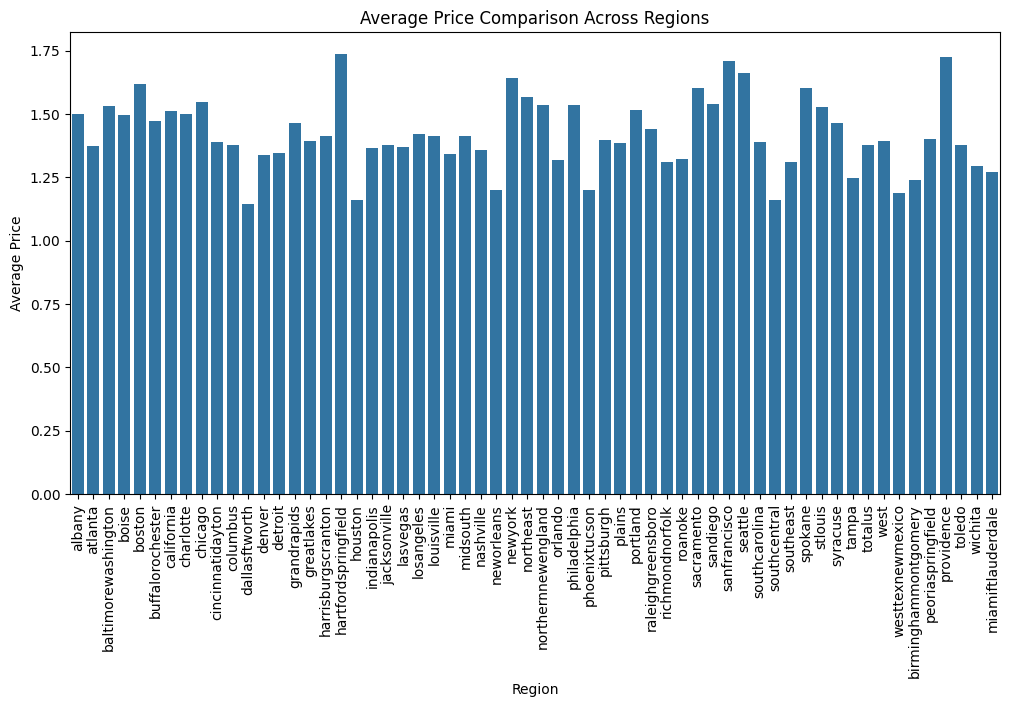

In [31]:
# Average Price by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='AveragePrice', data=df_clean, ci=None)
plt.xticks(rotation=90)
plt.title('Average Price Comparison Across Regions')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.show()

The bar chart shows clear differences in avocado prices across regions, with average prices ranging from approximately 0.75 to 1.75.

Regions like Harford Springfield and Providence have notably higher prices, suggesting stronger demand and potentially higher living costs. Consumers in these areas may be less sensitive to price changes, indicating a willingness to pay more for avocados.

In contrast, regions such as Dallas FT Worth and South Central have lower average prices, likely due to reduced demand or more efficient local supply chains. These areas may attract price-sensitive consumers seeking affordable options.

#### 2.3. Price Per Unit Volume Comparison by Region

Next, the focus will be on analyzing the Price Per Unit Volume Comparison by Region. This analysis aims to reveal how the price per unit of avocado varies across different regions, providing insights into how these variations may influence consumer purchasing decisions and overall market dynamics.

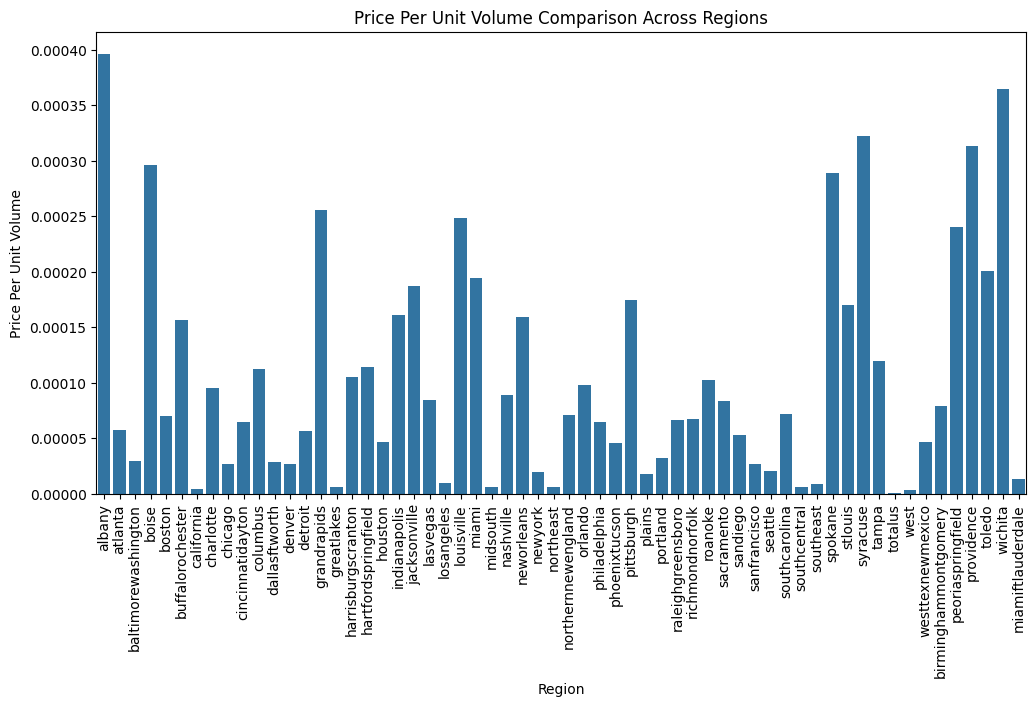

In [32]:
# Price Per Unit Volume by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='PricePerUnitVolume', data=df_clean, ci=None)
plt.xticks(rotation=90)
plt.title('Price Per Unit Volume Comparison Across Regions')
plt.xlabel('Region')
plt.ylabel('Price Per Unit Volume')
plt.show()


The analysis of price per unit volume of avocados reveals significant variations across regions. Some areas show higher prices, indicating different market dynamics and factors influencing pricing.

High-Price Regions: Areas like Albany and Wichita have higher prices per unit volume, possibly due to transportation costs, lower local production, or higher demand. Consumers in these regions may be less price-sensitive and willing to pay more.

Low-Price Regions: Regions such as Total US and West feature lower prices per unit volume, likely due to efficient local supply chains, higher local production, or reduced demand. These markets may attract more price-sensitive consumers seeking affordable options.

#### 2.4. Sales of Specific Hass Avocado size by Region (PLU 4046, 4225, 4770)

In this section, there will be an analysis of the Sales of Specific Hass Avocado Sizes by Region. The focus will be on three product look-up (PLU) codes: PLU 4046 (small/medium Hass avocados), PLU 4225 (large Hass avocados), and PLU 4770 (extra large Hass avocados). This analysis aims to uncover regional preferences for avocado sizes and how these preferences influence overall sales.


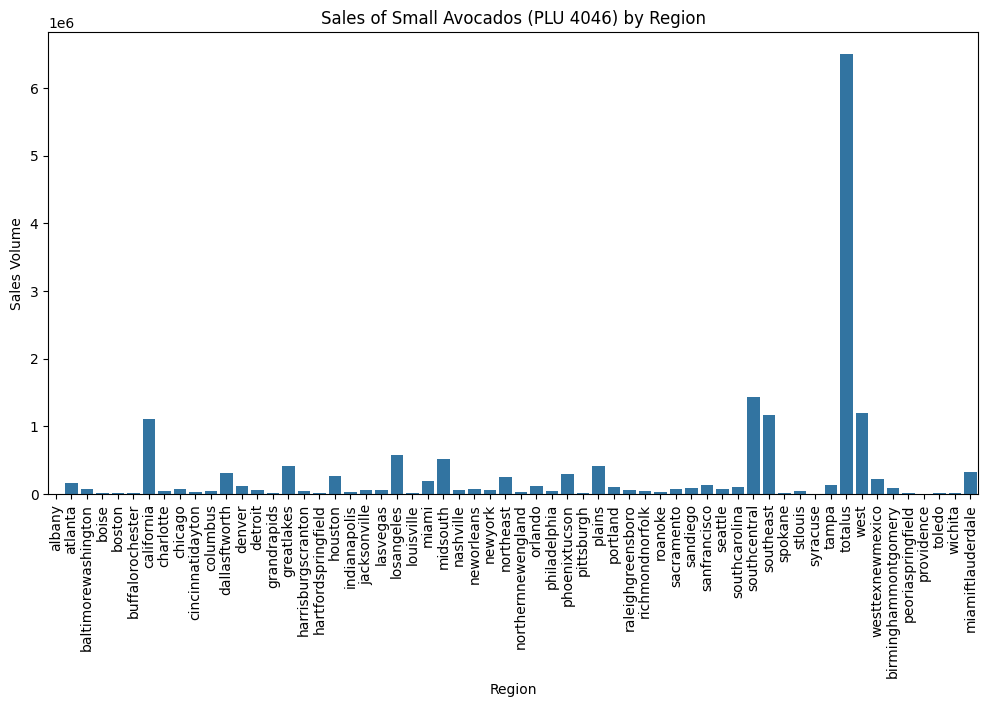

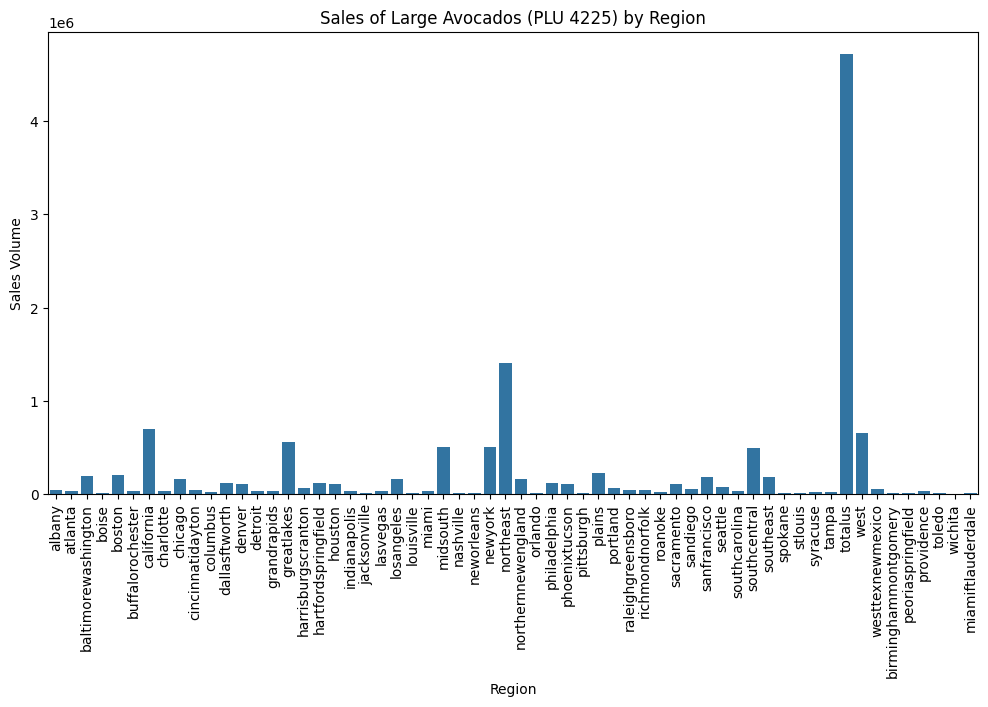

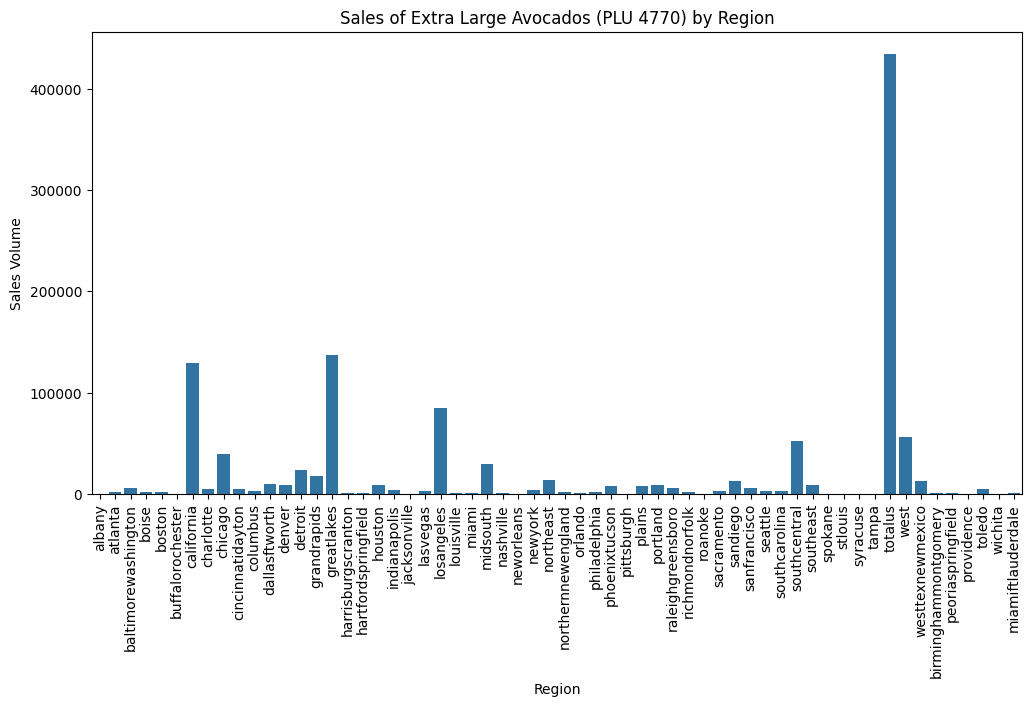

In [33]:
# Sales of Small Avocados (PLU 4046) by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='plu4046', data=df_clean, ci=None)
plt.xticks(rotation=90)
plt.title('Sales of Small Avocados (PLU 4046) by Region')
plt.xlabel('Region')
plt.ylabel('Sales Volume')
plt.show()

# Sales of Large Avocados (PLU 4225) by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='plu4225', data=df_clean, ci=None)
plt.xticks(rotation=90)
plt.title('Sales of Large Avocados (PLU 4225) by Region')
plt.xlabel('Region')
plt.ylabel('Sales Volume')
plt.show()

# Sales of Extra Large Avocados (PLU 4770) by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='plu4770', data=df_clean, ci=None)
plt.xticks(rotation=90)
plt.title('Sales of Extra Large Avocados (PLU 4770) by Region')
plt.xlabel('Region')
plt.ylabel('Sales Volume')
plt.show()

The analysis of avocado sales shows clear differences between regions for small/medium, large, and extra-large sizes. For small/medium Hass avocados (PLU 4046), Total US and South Central have high sales, showing strong demand. In contrast, Syracuse and Boise have much lower sales, indicating less interest in these areas.

For large Hass avocados (PLU 4225), Total US continues to lead in sales because of its local production. North east shows strong sales for this size. However, regions like Syracuse and Boise have lower sales, likely due to ineffective distribution or higher prices.

When looking at extra-large Hass avocados (PLU 4770), regions like Total Us and Great Lakes stand out with high sales, showing strong demand. Meanwhile, other regions report lower sales, possibly due to less interest or logistical issues.

In summary, Total US is a top market for all avocado sizes due to its strong production and lower shipping costs. On the other hand, Syracuse and Boise have lower sales across all sizes, likely due to less demand and higher prices, making them less appealing to consumers.

#### 2.5. Sales of Avocados in Different Bag Types by Region
Now, the focus will shift to analyzing the Sales of Avocados in Different Bag Types by Region. This analysis will explore how avocado sales vary based on packaging types, providing insights into consumer preferences and market dynamics across different regions.

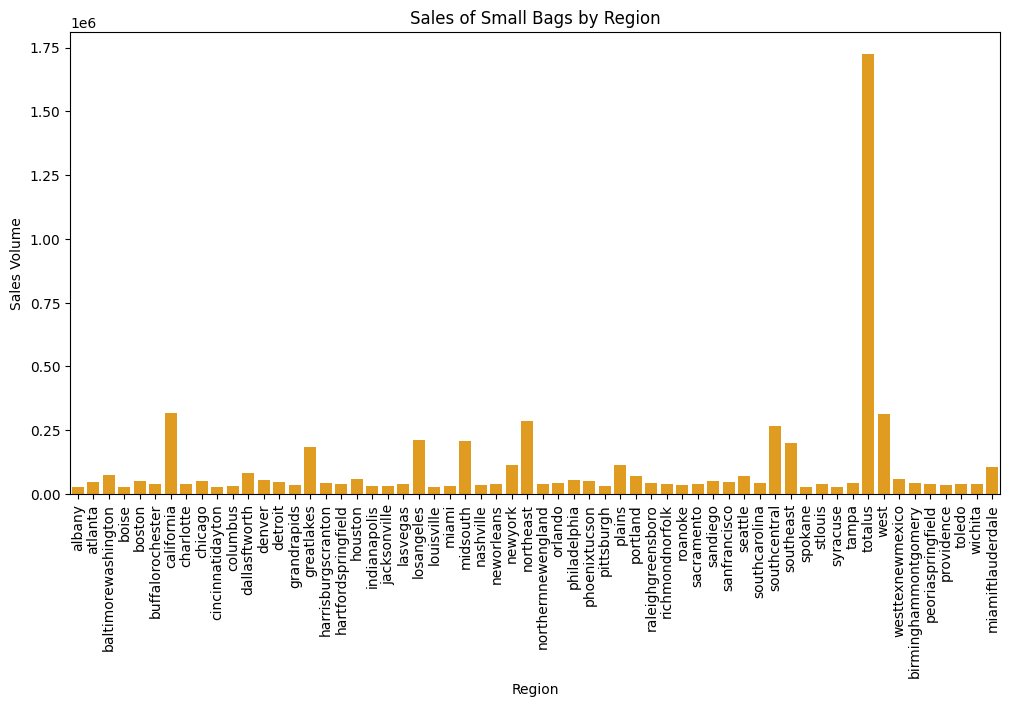

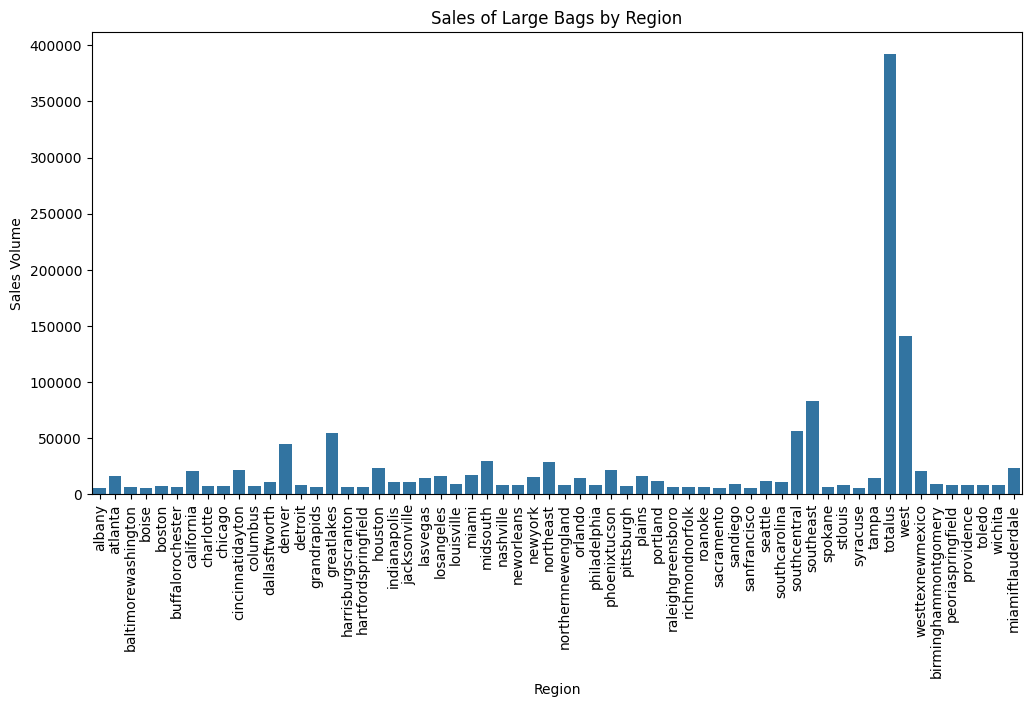

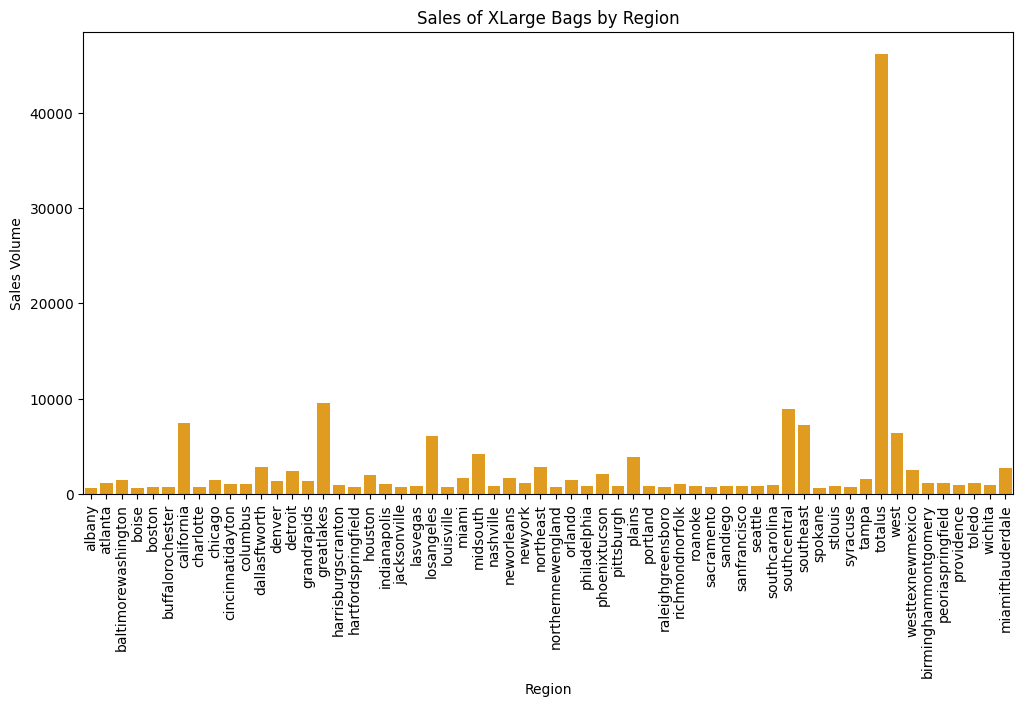

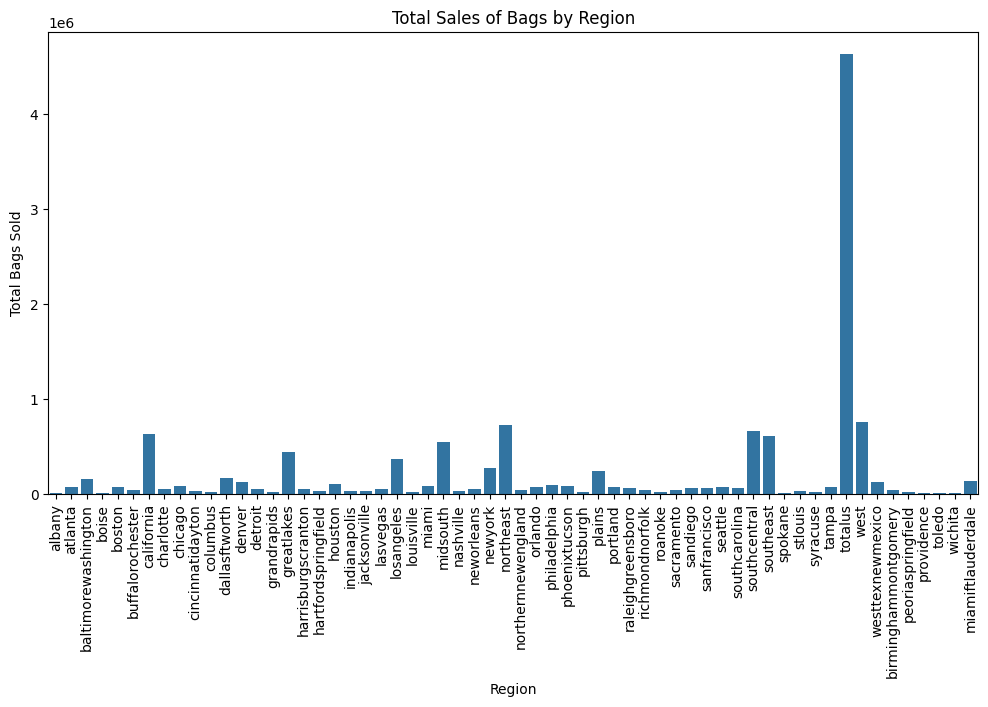

In [34]:
# Sales of Small Bags by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='SmallBags', data=df_clean, ci=None, color='orange')
plt.xticks(rotation=90)
plt.title('Sales of Small Bags by Region')
plt.xlabel('Region')
plt.ylabel('Sales Volume')
plt.show()

# Sales of Large Bags by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='LargeBags', data=df_clean, ci=None)
plt.xticks(rotation=90)
plt.title('Sales of Large Bags by Region')
plt.xlabel('Region')
plt.ylabel('Sales Volume')
plt.show()

# Sales of XLarge Bags by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='XLargeBags', data=df_clean, ci=None, color='orange')
plt.xticks(rotation=90)
plt.title('Sales of XLarge Bags by Region')
plt.xlabel('Region')
plt.ylabel('Sales Volume')
plt.show()

# Sales of Total Bags by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='TotalBags', data=df_clean, ci=None)
plt.xticks(rotation=90)
plt.title('Total Sales of Bags by Region')
plt.xlabel('Region')
plt.ylabel('Total Bags Sold')
plt.show()

The analysis of avocado sales in different bag types shows clear patterns across regions for small, large, and extra-large bags. The "Total U.S." region has the highest sales for small bags, showing strong overall demand. In contrast, Syracuse and Boise have much lower sales, indicating less interest or possible market issues.

For large bags, West Texas/New Mexico has the highest sales volume, suggesting a strong preference for this size. California also does well with large bags, likely due to good distribution strategies. However, Syracuse and Boise again show lower sales, which might be due to poor distribution or higher prices.

When it comes to extra-large bags, one region stands out with high sales, indicating strong demand. Other regions report lower sales, possibly due to less interest from consumers or logistical challenges.

In summary, the "Total U.S." region leads in small bags, while West Texas/New Mexico excels in large bags with effective distribution. California also performs well with large bags. On the other hand, Syracuse and Boise have lower sales across all bag sizes, likely due to lower demand and higher prices, making them less appealing to consumers. Now, we will move on to examining seasonal trends in avocado sales to see how the time of year affects buying behavior.

---

The regional analysis of avocado sales reveals significant variations in consumer preferences and market dynamics across different areas. Overall, Total US consistently emerges as a top market for all avocado sizes due to its strong production capabilities and lower transportation costs also indicating effective marketing strategies. However, regions like Syracuse and Boise exhibit lower sales across all sizes and bag types, likely due to less demand and higher prices. Additionally, the analysis of average prices and price per unit volume highlights differing price sensitivities among consumers in various regions, with high-price areas potentially indicating less sensitivity to cost. The next focus will be on analyzing **seasonal trends in avocado sales**. This analysis will provide insights into how different times of the year impact consumer purchasing decisions and overall market dynamics.

---

### 3.Seasonal Sales Analysis
This section focuses on visualizing trends based on different aspects of the dataset, such as monthly sales volumes, average prices, and seasonal comparisons of avocado types. Below are the relationships that will be explored:

3.1. Monthly Total Sales Volume Over Time

3.2. Monthly Average Price Over Time

3.3. Monthly Price Per Unit Volume Over Time

3.4. Average Price and Price Per Unit Volume by Month

3.5. Monthly sales of Avocado Types

3.6. Monthly Sales of Avocados by Hass Size (PLU 4046, 4225, 4770)

3.7. Monthly Sales of Avocados by Bag Size

#### 3.1. Monthly Total Sales Volume Over Time
The analysis will begin with examining the Monthly Total Sales Volume Over Time. By analyzing sales data on a monthly basis, a visual representation will be created to show how avocado sales fluctuate throughout the year. This will help identify peak sales periods and seasonal trends, offering valuable insights into consumer demand and behavior.

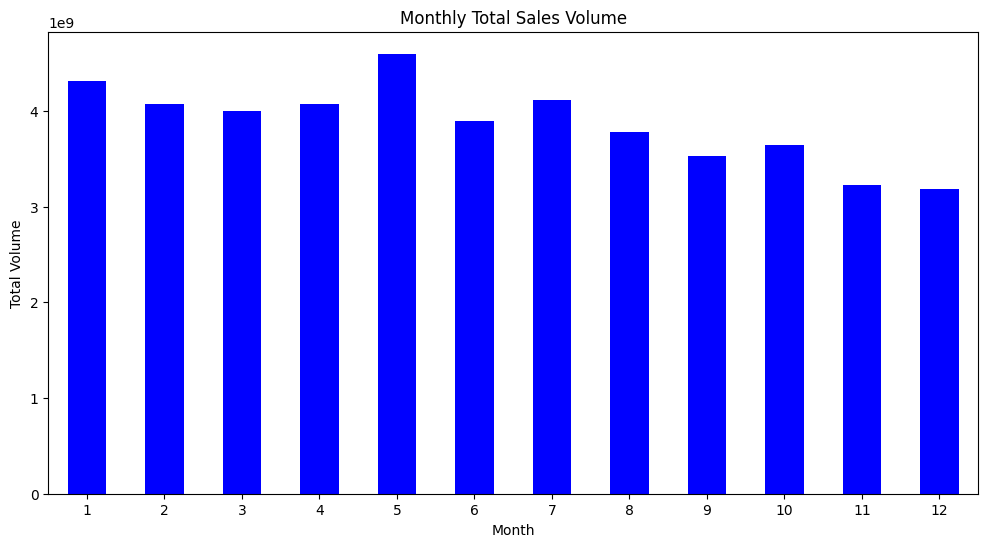

In [35]:
# Monthly Total Sales Volume using the 'Month' column
plt.figure(figsize=(12, 6))
monthly_sales_volume = df_clean.groupby('Month')['TotalVolume'].sum()

monthly_sales_volume.plot(kind='bar', color='blue')
plt.title('Monthly Total Sales Volume')
plt.xlabel('Month')
plt.ylabel('Total Volume')
plt.xticks(rotation=0)
plt.show()

The analysis reveals important insights into avocado sales trends throughout the year. Peak months, including May, July, and December, show significantly higher sales volumes, indicating robust consumer demand. In the U.S., warmer weather in May and July encourages outdoor activities, leading to increased consumption of fresh produce, such as avocados in salads and barbecues. December also sees a surge in sales due to festive gatherings and holiday meals, where avocados are popular for appetizers and party dishes.

On the other hand, low months like February and September demonstrate reduced sales volumes, suggesting these periods are off-peak for avocado sales. In February, colder weather often leads to a decline in fresh salad consumption, while September marks a transition to fall, resulting in lower demand as consumers opt for heartier seasonal dishes. Recognizing these trends is crucial for planning marketing strategies and managing inventory to better align with consumer preferences.

#### 3.2. Monthly Average Price Over Time

Next, the focus will be on analyzing the Monthly Average Price of Avocados Over Time. This analysis will explore how the average price fluctuates throughout the year, helping to identify trends, seasonal pricing patterns, and periods of price volatility.

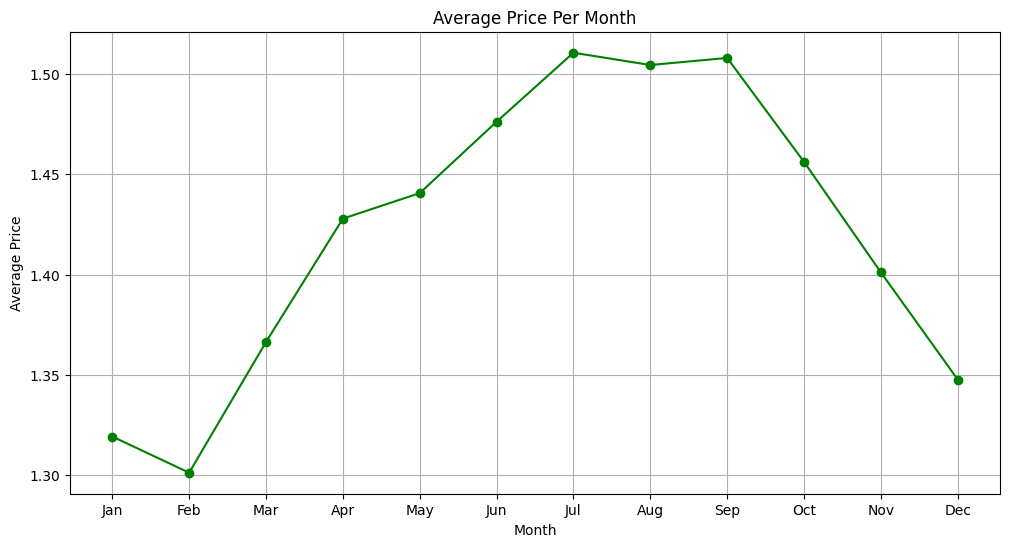

In [ ]:
# Average Price per Month using a Line Graph
plt.figure(figsize=(12, 6))

# Group the data by 'Month' and calculate the mean 'AveragePrice'
monthly_avg_price = df_clean.groupby('Month')['AveragePrice'].mean()

# Plot a line graph
monthly_avg_price.plot(color='green', marker='o', linestyle='-')  # Line with markers

# Set title and labels
plt.title('Average Price Per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')

# Set x-ticks to represent the months clearly
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.grid(True)  # add grid for easier reading of values
plt.show()


The average price of avocados ranges from about $0.80 to $1.40 per unit, with noticeable changes throughout the year. Some months, like July,August and September, have higher average prices, showing that there is more demand or less supply during these times. This could be due to seasonal trends or other market factors. On the other hand, months like January, February and December have lower average prices, which may mean there is more supply or less demand. These months could be good times for promotions or buying in bulk.

Next, we will explore Monthly Price Per Unit Volume Over Time to gain further insights into how pricing affects sales and consumer behavior throughout the year

#### 3.3. Monthly Price Per Unit Volume Over Time
The next step is to look at the Monthly Price Per Unit Volume of Avocados Over Time. This will show how the price per unit changes each month, helping to find trends, seasonal patterns, and times when prices change the most.

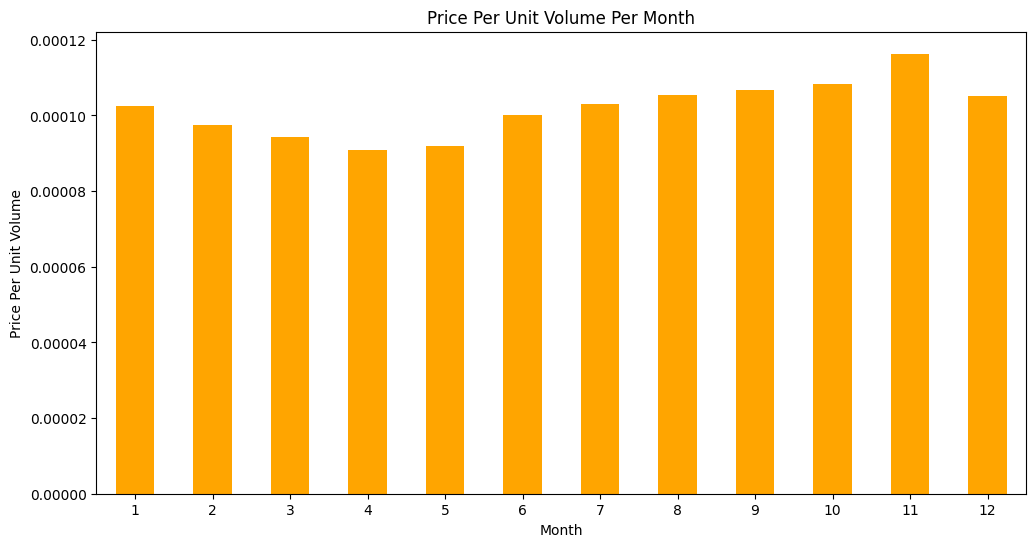

In [37]:
# Price Per Unit Volume per Month
plt.figure(figsize=(12, 6))
monthly_price_per_unit = df_clean.groupby('Month')['PricePerUnitVolume'].mean()

monthly_price_per_unit.plot(kind='bar', color='orange')
plt.title('Price Per Unit Volume Per Month')
plt.xlabel('Month')
plt.ylabel('Price Per Unit Volume')
plt.xticks(rotation=0)
plt.show()


The bar chart above shows the price per unit volume of avocados over a 12-month period. The prices remain relatively stable throughout the year, ranging from approximately 0.00002 to 0.00012, indicating minimal fluctuations in unit price. However, there is a slight increase during the first few months of the year (January to March), while prices dip a bit from April to September. In conclusion, this suggests a seasonal trend where avocado prices tend to be slightly higher in the early and late months of the year, likely driven by factors such as reduced supply or increased demand during the winter and holiday seasons.

#### 3.4. Total Volume sold per month by Type

The next step is to analyze the Total Volume of Avocados Sold Per Month by Type. This will look at how sales trends for conventional and organic avocados change throughout the year. Comparing their monthly sales volumes will provide insights into consumer preferences, seasonal demand, and how these factors impact the overall market.

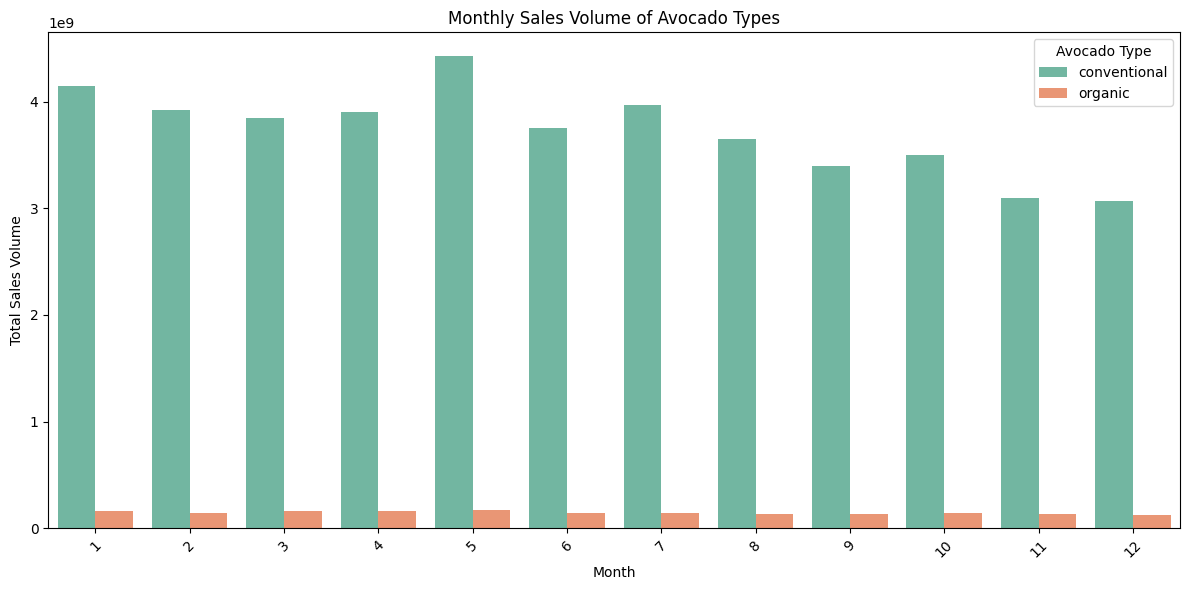

In [ ]:
# Grouping by Month and Type to get the total volume sold each month
monthly_sales_by_type = df_clean.groupby(['Month', 'type']).agg(TotalVolume=('TotalVolume', 'sum')).reset_index()

# Plotting
plt.figure(figsize=(12, 6))

sns.barplot(data=monthly_sales_by_type, x='Month', y='TotalVolume', hue='type', palette='Set2')

# Adding titles and labels
plt.title('Monthly Sales Volume of Avocado Types')
plt.xlabel('Month')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)
plt.legend(title='Avocado Type')
plt.tight_layout()

# Show the plot
plt.show()

The  graph above shows that conventional avocados consistently sell more than organic avocados each month. This means conventional avocados are more popular in the market. Both types have some ups and downs in sales throughout the year, but conventional avocados always have much higher volumes. The biggest sales for both types happen around months 1 and 5, while the lowest sales occur in months 11 and 12. This gives us a clear idea of when avocado sales are highest and how conventional avocados dominate the market.

#### 3.5. AveragePrice of Avocado Types by Month
The next step is to analyze the Average Price of Avocado Types by Month. This will show how the prices of conventional and organic avocados change over time. By comparing monthly prices, trends in consumer preferences and how each type performs during the year can be identified.

<Figure size 1200x600 with 0 Axes>

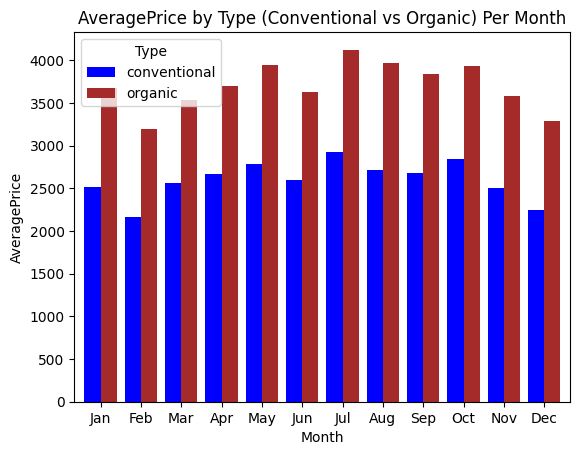

In [ ]:
#  Sales of Avocado by Type (Conventional vs Organic) across Months using a Grouped Bar Graph
plt.figure(figsize=(12, 6))

# Group by 'Month' and 'type', then calculate the sum of 'TotalVolume'
monthly_sales_by_type = df_clean.groupby(['Month', 'type'])['AveragePrice'].sum().unstack()

# Plot a grouped bar graph
monthly_sales_by_type.plot(kind='bar', color=['blue', 'brown'], width=0.8)

# Set the title and labels
plt.title('AveragePrice by Type (Conventional vs Organic) Per Month')
plt.xlabel('Month')
plt.ylabel('AveragePrice')

# Set x-ticks to represent the months clearly
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)

# Display the plot
plt.legend(title='Type')  # Adds a legend to indicate Conventional vs Organic
plt.show()


The chart compares the average prices of conventional and organic avocados per month. Organic avocados consistently have a higher average price throughout the year. In every month, the price difference is clear, with organic prices significantly higher than conventional ones.

This chart highlights the cost differences between conventional and organic avocados, providing insights into consumer pricing trends over time.

#### 3.6. Monthly Sales of Avocados by Hass Size (PLU 4046, 4225, 4770)
The next step is to analyze the Monthly Sales of Avocados by Hass Size, focusing on the three product codes: small/medium (PLU 4046), large (PLU 4225), and extra-large (PLU 4770). This analysis will show how sales for each size change throughout the year, helping to identify the most popular sizes during different months and how demand shifts with the seasons.



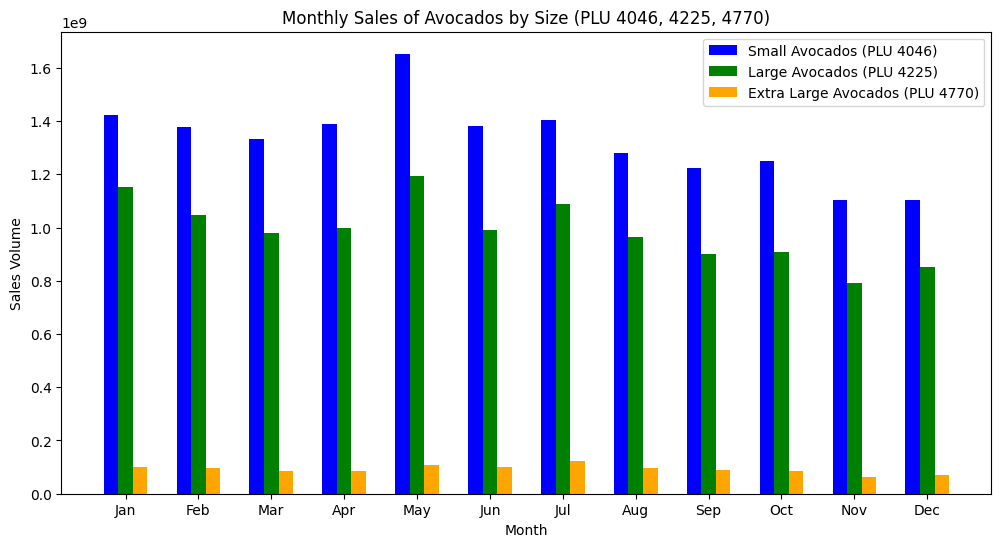

In [40]:
# Monthly Sales of Small, Large, and Extra Large Avocados (PLU 4046, 4225, 4770)
plt.figure(figsize=(12, 6))

monthly_sales_4046 = df_clean.groupby('Month')['plu4046'].sum()
monthly_sales_4225 = df_clean.groupby('Month')['plu4225'].sum()
monthly_sales_4770 = df_clean.groupby('Month')['plu4770'].sum()

plt.bar(monthly_sales_4046.index - 0.2, monthly_sales_4046, width=0.2, label='Small Avocados (PLU 4046)', color='blue')
plt.bar(monthly_sales_4225.index, monthly_sales_4225, width=0.2, label='Large Avocados (PLU 4225)', color='green')
plt.bar(monthly_sales_4770.index + 0.2, monthly_sales_4770, width=0.2, label='Extra Large Avocados (PLU 4770)', color='orange')

plt.title('Monthly Sales of Avocados by Size (PLU 4046, 4225, 4770)')
plt.xlabel('Month')
plt.ylabel('Sales Volume')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.show()


The bar chart titled “Monthly Sales of Avocados by Size (PLU 4046, 4225, 4770)” shows how many small, large, and extra-large avocados were sold each month over the year. Small avocados (PLU 4046), shown in blue, have the highest sales in most months. Large avocados (PLU 4225), in green, have moderate sales, usually lower than small avocados but higher than extra-large avocados (PLU 4770), which are shown in orange and have the lowest sales. Small avocados have steady sales throughout the year, with a few months seeing slightly higher sales. In contrast, large and extra-large avocados have more ups and downs in sales from month to month. Overall, sales for all sizes tend to be highest in the summer months, from June to August, and drop towards the end of the year, especially in November and December.

#### 3.7. Monthly Sales of Avocados by Bag Size
Finally, the analysis will focus on the monthly sales of avocados based on different bag sizes, specifically small, large, and extra-large bags. This will help understand how consumer preferences change with packaging and how these trends vary over time.

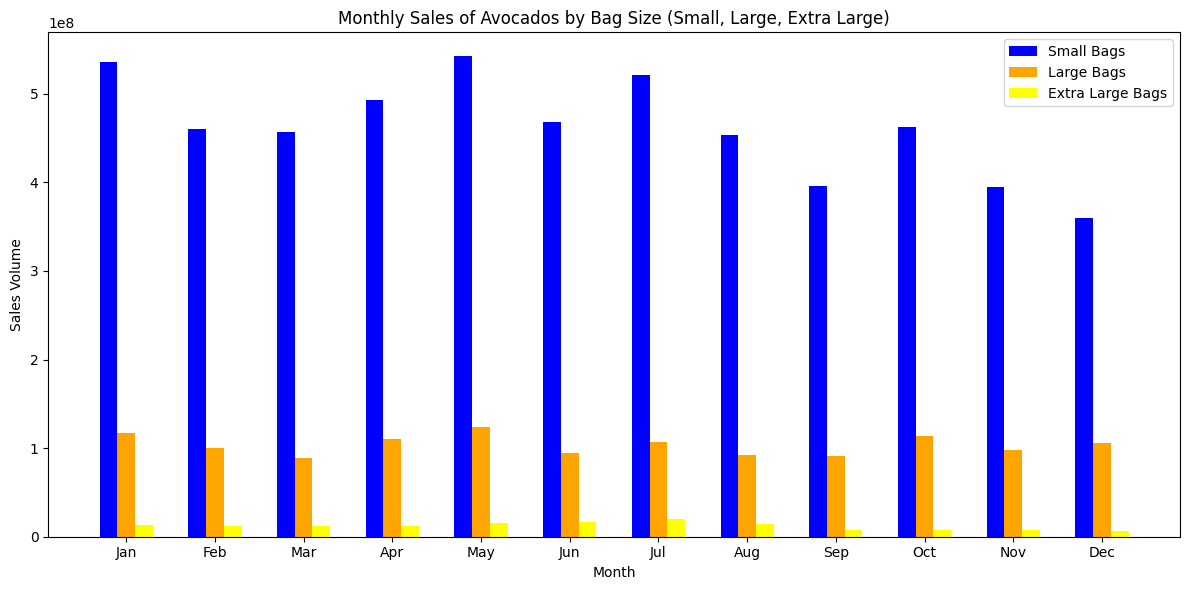

In [41]:
# Monthly Sales of Small, Large, and Extra Large Bags of Avocados
plt.figure(figsize=(12, 6))

# Group by 'Month' and sum the sales of different bag types
monthly_sales_small_bags = df_clean.groupby('Month')['SmallBags'].sum()
monthly_sales_large_bags = df_clean.groupby('Month')['LargeBags'].sum()
monthly_sales_xlarge_bags = df_clean.groupby('Month')['XLargeBags'].sum()

# Plotting the bar chart for the different bag sizes
plt.bar(monthly_sales_small_bags.index - 0.2, monthly_sales_small_bags, width=0.2, label='Small Bags', color='blue')
plt.bar(monthly_sales_large_bags.index, monthly_sales_large_bags, width=0.2, label='Large Bags', color='orange')
plt.bar(monthly_sales_xlarge_bags.index + 0.2, monthly_sales_xlarge_bags, width=0.2, label='Extra Large Bags', color='yellow')

# Adding titles and labels
plt.title('Monthly Sales of Avocados by Bag Size (Small, Large, Extra Large)')
plt.xlabel('Month')
plt.ylabel('Sales Volume')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


The graph above compares the sales volumes of avocados in different bag sizes throughout the year. Small bags, shown in blue, have the highest sales in most months. Large bags, represented by orange bars, have moderate sales, typically lower than small bags but higher than extra-large bags, which are shown in yellow and have the lowest sales all year. Small bags maintain steady sales with a few months having slightly higher sales. In contrast, large and extra-large bags experience more ups and downs in their sales volumes. Overall, sales for all bag sizes tend to peak during the summer months, from June to August, and decrease towards the end of the year, particularly in November and December.

---
Overall, the analysis of avocado sales reveals several important seasonal insights. Sales volumes peak in May, July, and December, driven by warmer weather in May and July that encourages outdoor eating and fresh produce consumption, while December sees increased sales due to holiday gatherings and festive meals. Conversely, sales drop in February and September, as the cold weather in February reduces interest in fresh salads, and September marks a transition from summer to fall, leading to lower demand for avocados. Pricing trends also fluctuate throughout the year, with higher average prices in May and December, likely due to increased demand or reduced supply, while February and September often feature lower prices, indicating higher supply or lower demand, which could be advantageous for promotions. Additionally, sales of small bags consistently outperform those of large and extra-large bags, with summer months showing significant peaks. In terms of type, conventional avocados dominate sales compared to organic options, highlighting a stronger consumer preference for conventional products.

---

### 4. More Analysis

#### 4.1. Correlation Analysis

To investigate price sensitivity, the correlation between average prices and sales volumes will be analyzed. A strong negative correlation would suggest that as prices rise, sales volumes decrease, indicating that consumers are price-sensitive.

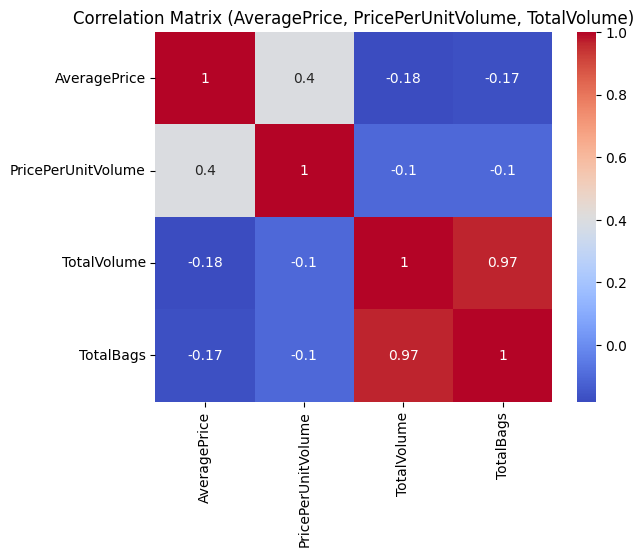

In [42]:
corr_matrix = df_clean[['AveragePrice', 'PricePerUnitVolume', 'TotalVolume','TotalBags']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (AveragePrice, PricePerUnitVolume, TotalVolume)')
plt.show()

There is a moderate positive correlation (0.4) between average price and price per unit volume, meaning that as the price per unit increases, the average price tends to go up too. However, the average price has a weak negative correlation (-0.18) with total volume sold, suggesting that higher prices might lead to slightly lower sales. This trend is similar for total bags sold, which has a weak negative correlation (-0.17) with average price. For price per unit volume, there is also a weak negative correlation (-0.1) with both total volume and total bags sold, indicating that higher prices could mean fewer sales. On the other hand, there is a very strong positive correlation (0.97) between total volume sold and the number of bags sold, which shows that when more avocados are sold, more bags are used. Overall, the weak negative correlations suggest that higher prices can reduce sales, while the strong positive correlation highlights that as sales volume increases, the number of bags used also increases.

#### 4.2. Trend Analysis


4.2.1. Long-Term Trends

This section assesses how avocado prices and sales volumes have changed over the years, helping to identify long-term shifts in consumer behavior or economic impacts. First, the data is grouped by year, and then the total sales volume is summed, and the average price is calculated. Here’s the code for that:

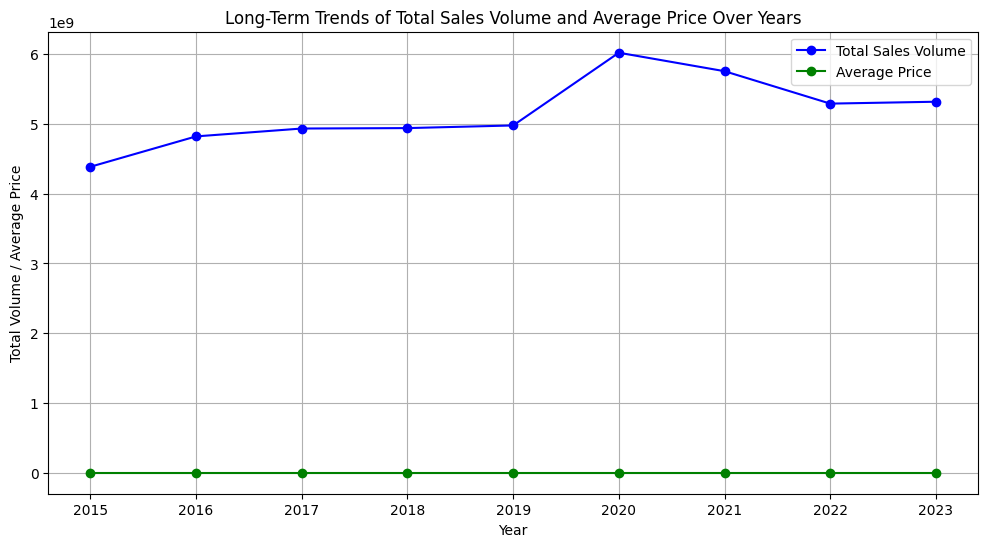

In [ ]:
# Grouping by Year to analyze long-term trends
yearly_trends = df_clean.groupby('Year').agg({'TotalVolume': 'sum', 'AveragePrice': 'mean'}).reset_index()

# Plotting the trends with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Total Sales Volume on the first y-axis
ax1.plot(yearly_trends['Year'], yearly_trends['TotalVolume'], marker='o', label='Total Sales Volume', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Sales Volume', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating the second y-axis for Average Price
ax2 = ax1.twinx()
ax2.plot(yearly_trends['Year'], yearly_trends['AveragePrice'], marker='o', label='Average Price', color='green')
ax2.set_ylabel('Average Price', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Adding titles and grid
plt.title('Long-Term Trends of Total Sales Volume and Average Price Over Years')
ax1.grid(True)
fig.tight_layout()  # Adjust the layout to prevent clipping
plt.show()


The graph shows avocado sales and prices from 2015 to 2022. The blue line represents total sales volume, which goes up and down over the years. There are clear high points and low points, but overall, sales volume stays above the middle level. The green line shows the average price, which remains stable throughout the years and stays below the middle level, meaning prices haven't changed much.

The changes in total sales volume might be affected by things like seasonal demand, market conditions, and supply chain issues. By looking at the years with the highest and lowest sales, we can learn what caused these changes, such as promotions, economic situations, or shifts in what consumers want. The steady average price indicates that the avocado market is stable, which is good for both buyers and sellers because it leads to predictable prices.

4.1.2. Rolling Averages

Calculating rolling averages helps to smooth out short-term fluctuations and reveal longer-term trends. A 3-month rolling average will be used to balance responsiveness with stability, allowing for a clearer view of the data's underlying patterns. By applying this to both total sales volume and average price, trends over time can be visualized. This will help identify any significant patterns or shifts in the data, providing deeper insights into avocado sales.

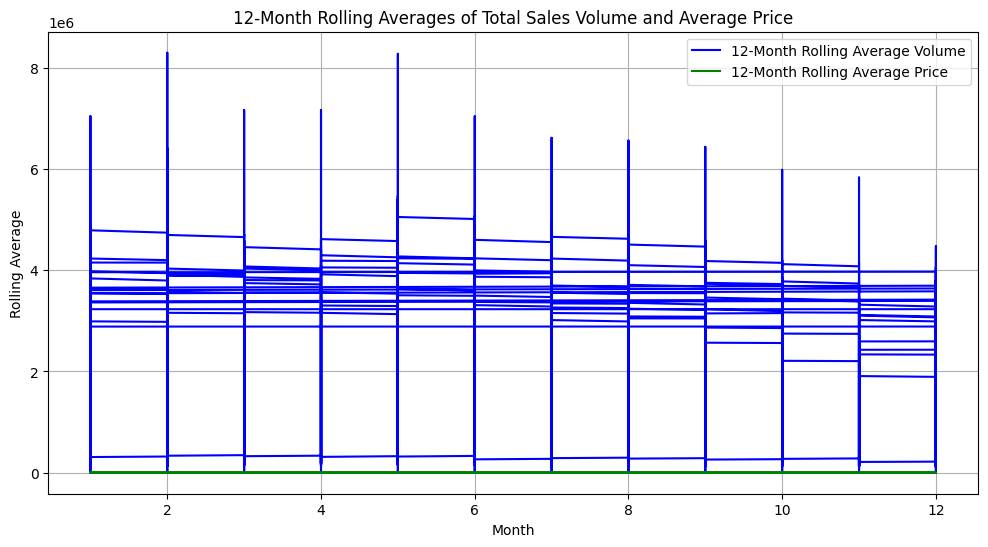

In [44]:
# Calculating rolling averages
df_clean['RollingAverageVolume'] = df_clean['TotalVolume'].rolling(window=12).mean()
df_clean['RollingAveragePrice'] = df_clean['AveragePrice'].rolling(window=12).mean()

# Plotting the rolling averages
plt.figure(figsize=(12, 6))
plt.plot(df_clean['Month'], df_clean['RollingAverageVolume'], label='12-Month Rolling Average Volume', color='blue')
plt.plot(df_clean['Month'], df_clean['RollingAveragePrice'], label='12-Month Rolling Average Price', color='green')

plt.title('12-Month Rolling Averages of Total Sales Volume and Average Price')
plt.xlabel('Month')
plt.ylabel('Rolling Average')
plt.legend()
plt.grid()
plt.show()


The line graph titled “12-Month Rolling Averages of Total Sales Volume and Average Price” shows the trends in avocado sales and prices over the year. The blue line represents the 12-month rolling average volume, which fluctuates with noticeable peaks and dips, indicating times of higher and lower sales. Overall, the volume stays around the middle of the y-axis(4), showing moderate variability. The green line represents the 12-month rolling average price, which also varies but remains constant over the months, suggesting that avocado prices are on the rise.

These fluctuations in sales volume indicate that avocado sales follow cyclical patterns, likely influenced by seasonal demand, market conditions, or other outside factors. By looking at the specific months when sales peak or drop, we can better understand what drives these changes, such as promotions, economic conditions, or shifts in consumer preferences. The upward trend in average prices indicates that the avocado market has been experiencing higher prices throughout the year, possibly due to increased demand, changes in supply chains, or inflation.

#### 4.3. Monthly Sales Volume and Average Price Over Time

In this section, the trends in avocado sales volume over time, specifically from 2015 to 2023, will be analyzed. A time series plot will be created to visualize how the total sales volume of avocados has changed throughout these years. This will help to identify any patterns, growth trends, or fluctuations in sales, providing valuable insights into long-term demand and market behavior.

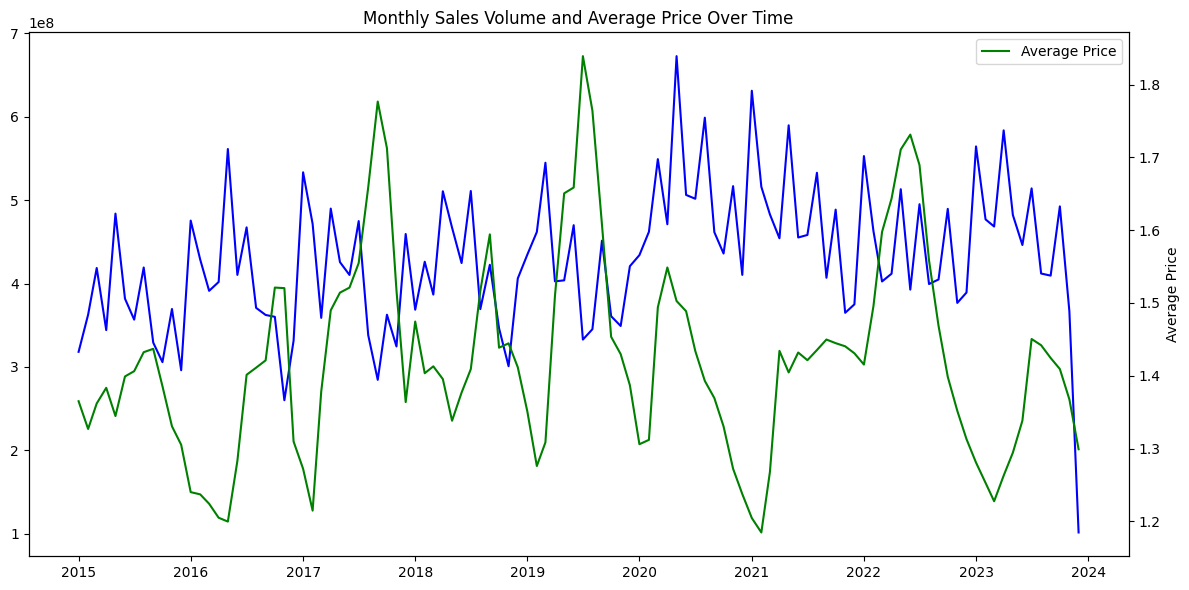

In [45]:
# Group by Year and Month to aggregate TotalVolume and AveragePrice
monthly_data = df_clean.groupby(['Year', 'Month']).agg(
    TotalVolume=('TotalVolume', 'sum'),
    AveragePrice=('AveragePrice', 'mean')
).reset_index()

# Create a combined Month-Year column for easier plotting
monthly_data['Month-Year'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(DAY=1))

# Plotting
plt.figure(figsize=(12, 6))

# Total Sales Volume
plt.plot(monthly_data['Month-Year'], monthly_data['TotalVolume'], label='Total Sales Volume', color='blue')

# Average Price (using secondary y-axis)
ax2 = plt.gca().twinx()
ax2.plot(monthly_data['Month-Year'], monthly_data['AveragePrice'], label='Average Price', color='green')

# Titles and Labels
plt.title('Monthly Sales Volume and Average Price Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Volume')
ax2.set_ylabel('Average Price')

# Legends
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

The observations about avocado sales and prices show that the monthly sales volume, shown by the blue line, varies a lot with clear peaks and dips. This means that sales can go up and down throughout the year, reflecting changes in demand and other factors. Overall, the sales volume tends to stay around the middle of the left y-axis scale, indicating moderate changes. On the other hand, the average price, shown by the green line, also varies but generally trends upward over time, increasing from about 1.2 to 1.8 on the right y-axis scale. This suggests that the average price of avocados has been gradually going up.

The ups and downs in monthly sales volume indicate that avocado sales are affected by seasonal demand, market conditions, and other factors. Looking at specific months with peaks and dips can help us understand why these changes happen, like special promotions or shifts in what consumers want. Additionally, the upward trend in average price suggests that avocado prices have been rising over the years, which could be due to higher demand, changes in how avocados are supplied, or inflation.

#### 4.4 Word Cloud of Avocado Sales by Region

In this section, a visual representation will be created to display the volume of avocado sales across various regions. The names of the regions will be shown in different font sizes, with larger names representing higher sales volumes. This approach makes it easy to quickly identify the regions with the highest avocado consumption, as those areas will be more prominent in the visualization. The larger the region name, the higher its avocado sales, offering an intuitive way to analyze regional sales patterns.

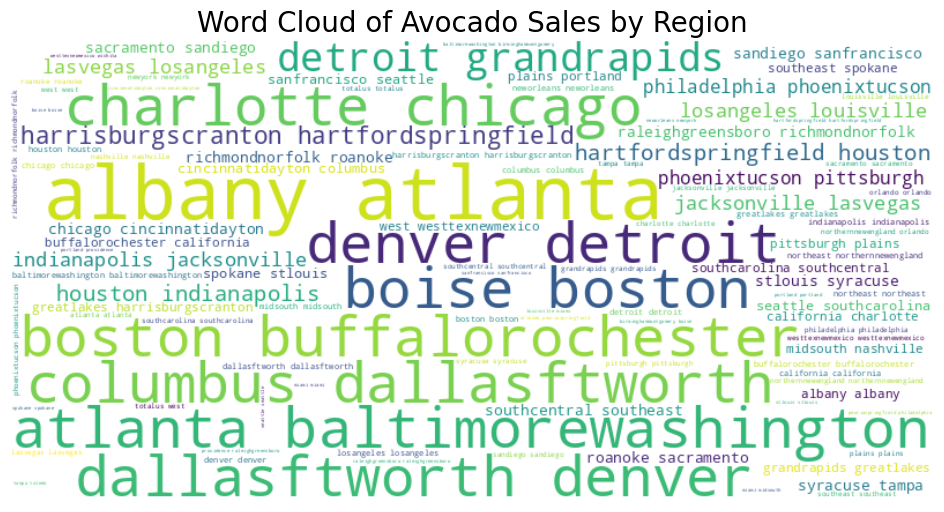

In [46]:
# Create a string of all region names
regions_text = ' '.join(df_clean['region'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(regions_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Avocado Sales by Region', fontsize=20)
plt.show()


The word cloud above visually displays avocado sales volumes across various regions, revealing key insights into market concentration and regional preferences. Prominent areas such as **Los Angeles**, **Chicago**, and **Dallas** are highlighted, indicating they have the highest avocado sales volumes, likely due to their larger populations and market access. Other significant markets include **Atlanta**, **San Francisco**, **Seattle**, **Phoenix**, **Houston**, and **Denver**, which also show substantial sales. Conversely, regions with smaller font sizes, like **St. Louis**, **Syracuse**, and **Spokane**, suggest lower sales volumes. This distribution indicates that avocado consumption is widespread across the country, with major metropolitan areas leading the demand. The findings also suggest potential for market expansion in smaller regions through targeted marketing strategies to boost sales. Collectively, these key cities represent a large portion of avocado sales in the United States and likely account for a significant part of the "Total US" sales due to their larger populations and demand for avocados.

---
In this section, the avocado sales data was explored to gain insights into consumer preferences, market trends, and seasonal changes across different regions. The analysis revealed that the Total US market has the highest sales, driven by strong production and effective marketing strategies. In contrast, regions like Syracuse and Boise show lower sales, likely due to weaker demand and higher prices. This highlights the importance of regional factors, such as production levels and pricing, in influencing avocado sales.

I found that avocado sales peak in May, July, and December, driven by warm weather and holiday celebrations, while sales drop in February and September. Prices also varied throughout the year; they were higher during busy months and lower during quieter times, which could be good for promotions.

Sales of small bags of avocados consistently did better than larger sizes, and most consumers preferred conventional avocados over organic ones. I also noticed a weak negative relationship between average prices and sales volumes, meaning that when prices go up, sales might go down a little.

Long-term trends from 2015 to 2023 revealed that while avocado sales fluctuated, average prices remained mostly stable, providing valuable insights into consumer behavior and market conditions. By applying 3-month rolling averages, clearer patterns emerged, which were visualized in a time series plot showing changes in sales and average prices over time. This analysis helps us understand the key factors influencing avocado sales over the years. The next step will be to forecast future sales based on the patterns and trends uncovered during the analysis.

---

<a id="six"></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

Modeling involves creating a mathematical representation of a system, process, or relationship using empirical data. This process encompasses various steps and techniques aimed at understanding, predicting, and optimizing outcomes based on available information. The primary purposes of modeling include forecasting future outcomes such as predicting avocado sales based on historical patterns, uncovering relationships between variables like how price, seasonality, and region influence avocado sales and finding optimal solutions, such as determining the best pricing strategies to maximize sales. There are different types of models, including descriptive models that summarize data characteristics through metrics like mean and median, predictive models that forecast future data points using approaches like linear regression and time series forecasting (e.g., ARIMA, XGBoost, and Random Forest), and prescriptive models that suggest actions to achieve desired outcomes, such as recommending optimal inventory levels based on demand forecasts.

Process:

1. Data Preparation
2. Model Selection
3. Model Training and Evaluation


#### 1. Data Preparation:
Cleaning and transforming the data to ensure it is suitable for modeling. This may include handling missing values, encoding categorical variables, and scaling numerical features.

In this case, only the numerical features will be scaled. This step is essential for ensuring that all numerical data is on a similar scale, which helps improve the performance and accuracy of machine learning models, especially those sensitive to feature magnitudes, such as linear regression or k-nearest neighbors. Scaling ensures that no single feature dominates the others during model training.


In [47]:
from sklearn.preprocessing import StandardScaler

# Standardize features
features = df_clean[['AveragePrice','Month', 'Year']]
scaler = StandardScaler()

# Fit the scaler and transform the features
features_scaled = scaler.fit_transform(features)

# Create a DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=df_clean.index)

# Include the target variable (TotalVolume) for training models
data_scaled = pd.concat([df_clean[['TotalVolume']], features_scaled_df], axis=1)


In [48]:
# Create lagged features
for lag in range(1, 13):  # Creating 12 lagged features for the last year
    data_scaled[f'lag_{lag}'] = data_scaled['TotalVolume'].shift(lag)

# Drop NaN values
data_scaled.dropna(inplace=True)

# Update X to include lagged features
X = data_scaled[['AveragePrice', 'Month', 'Year'] + [f'lag_{lag}' for lag in range(1, 13)] + [col for col in data_scaled.columns if 'Region_' in col]]
# Transform target variable
y = np.log1p(data_scaled['TotalVolume'])
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 2.Model Selection

Choosing the appropriate modeling technique based on the problem at hand, the nature of the data, and the desired outcome.For this analysis, the following models will be used:

A. `Linear Regression:` A simple yet effective method to analyze the relationship between sales and various independent features.

B.`Random Forest`: An ensemble learning method that uses multiple decision trees,can be used for forecasting and it is useful for capturing non-linear relationships in the data.

C. `XGBoost:` Gradient boosting algorithms that can be adapted for time series forecasting.Good for capturing non-linear relationships and interactions in your data.

These models will help identify which one offers the best predictions for avocado sales and prices based on the available features.



#### 3. Training and evaluation
Involves using historical data to train predictive models, allowing them to learn underlying patterns. After training, model evaluation assesses performance using metrics like RMSE, MAE, and R² to determine how well the model generalizes to unseen data and identify areas for improvement.

Well, for this analysis, the `RMSE` will be used because it effectively measures how accurate my forecasting model is in predicting avocado sales. RMSE helps highlight larger prediction errors, which is crucial for avoiding inventory problems and revenue loss. Since it is expressed in the same units as avocado sales, it makes it easy to understand how close the predictions are to actual sales figures. Additionally, RMSE allows for straightforward comparisons between different models, such as XGBoost, and Random Forest, to identify the best approach for capturing sales patterns. Minimizing RMSE is key to improving forecasting accuracy and optimizing inventory management strategies for avocado sales.

**A. Baseline Model**

**A. Linear Regression Model**


Linear Regression RMSE: 1.588760709133661


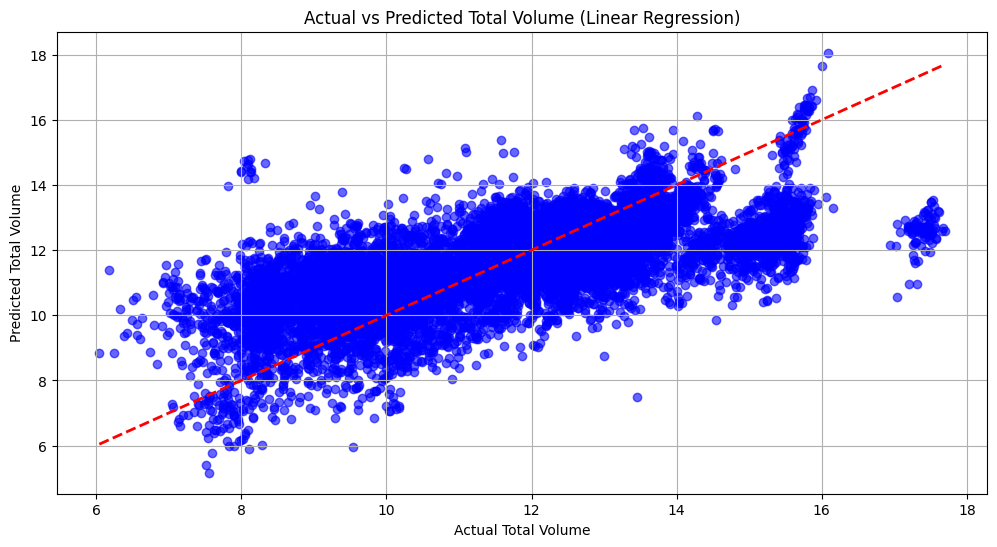

In [49]:
# 1. TRAINING PHASE

# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# 2. EVALUATION PHASE

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Linear Regression RMSE: {rmse}')

# Visualize Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Total Volume (Linear Regression)')
plt.xlabel('Actual Total Volume')
plt.ylabel('Predicted Total Volume')
plt.grid()
plt.show()


The graph shows a scatter plot comparing actual and predicted total avocado volumes using a linear regression model. Each blue dot represents a data point, while the red dashed line indicates where the predicted values would match the actual values. The Root Mean Square Error (RMSE) is 1.59, reflecting the average difference between the actual and predicted values.

Most predictions are close to the actual values, but there are some noticeable differences. A lower RMSE indicates better accuracy, and while this model performs reasonably well, there is still room for improvement.

Next, the Random Forest model will be explored for predicting avocado sales. This model combines multiple decision trees to enhance accuracy and reduce overfitting. Random Forest is effective at capturing complex relationships in the data and works well with both numerical and categorical features. By using it, i aim to improve our predictions and achieve better overall performance compared to the linear regression model.

**B. Random Forest**

Random Forest RMSE: 0.32676245328503956


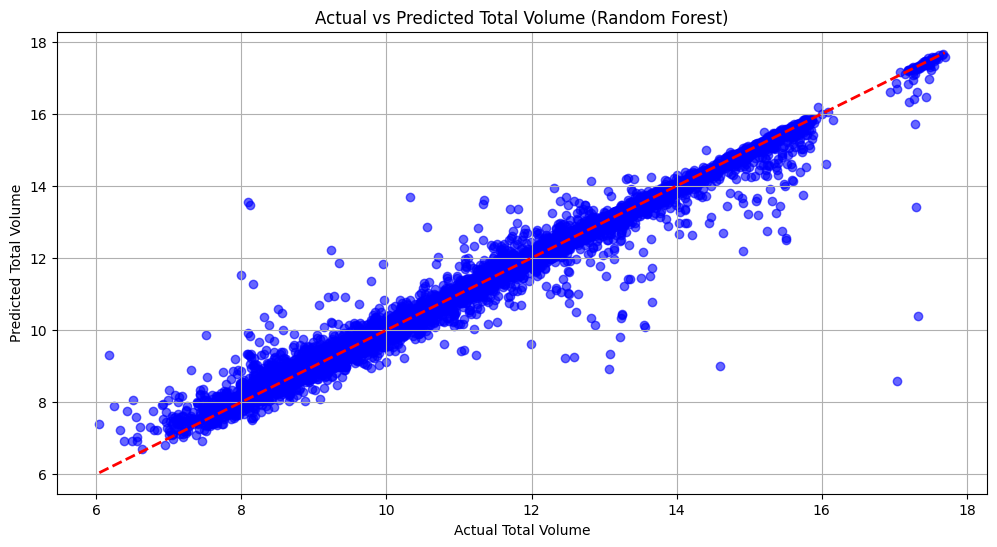

In [50]:
# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Calculate RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Random Forest RMSE: {rf_rmse}')

# Visualize Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Total Volume (Random Forest)')
plt.xlabel('Actual Total Volume')
plt.ylabel('Predicted Total Volume')
plt.grid()
plt.show()

The scatter plot shows how well the Random Forest model predicts avocado sales volumes compared to the actual values. Each blue dot is a data point, and the red dashed line represents perfect predictions. The Root Mean Squared Error (RMSE) for this model is 0.327, which means the predictions are quite accurate because most points are close to the ideal line. A lower RMSE indicates better accuracy.

Next up, will be the XGBoost, a strong algorithm that can better capture complex patterns in the data and improve the avocado sales forecasts.

**C. XGBOOST**

Root Mean Squared Error (RMSE) for XGBoost: 0.4023935735020295


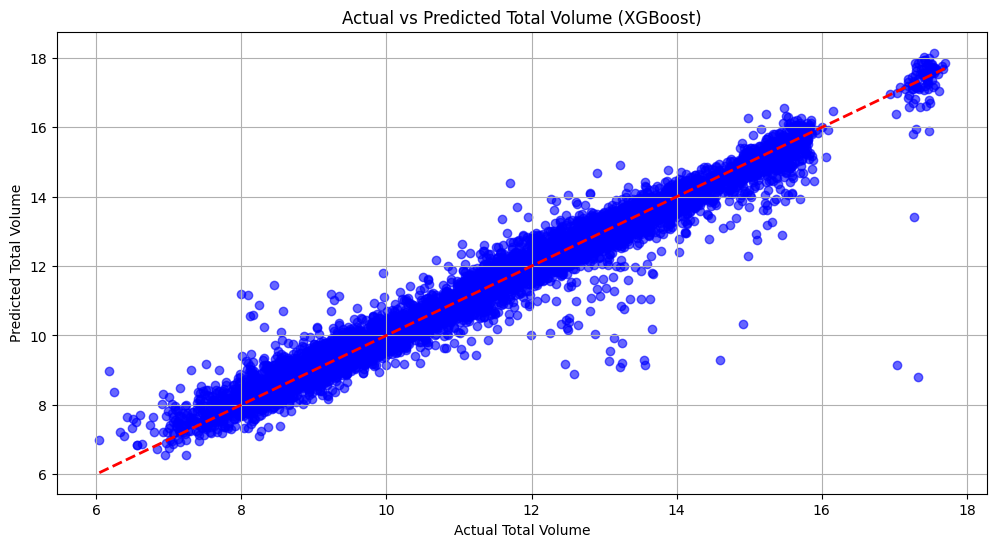

In [51]:
# Initialize the XGBoost model
model_xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model on the standardized data
model_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f'Root Mean Squared Error (RMSE) for XGBoost: {rmse_xgb}')

# Visualize Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Total Volume (XGBoost)')
plt.xlabel('Actual Total Volume')
plt.ylabel('Predicted Total Volume')
plt.grid()
plt.show()


The scatter plot shows how well the model (XGBoost) predicted avocado sales. Blue dots are actual data points, and the red line shows the trend. The model is quite good since the Root Mean Squared Error (RMSE) is 0.402. This means most predictions are close to the real values. Lower RMSE means better predictions.

The scatter plots for the linear regression, Random Forest, and XGBoost models illustrate their performance in predicting total avocado volumes. The linear regression model has an RMSE of 1.59, indicating a reasonable level of accuracy but with noticeable deviations from actual values. The Random Forest model improves this performance, achieving an RMSE of 0.327, with predictions closely clustered around the ideal prediction line. The XGBoost model further refines predictions, with an RMSE of 0.402, showing strong performance in capturing sales patterns.

While all three models show different levels of success in predicting avocado sales, there is still potential for improvement in accuracy and performance. Therefore, the next step will be the tuning and validation phase. In this stage, the parameters of the models will be optimized to improve their predictive capabilities and ensure they generalize well to unseen data. 

<a id="seven"></a>
## **Model Tuning and Validation**
<a href=#toc>Back to Table of Contents</a>

In this section, the focus is on two critical aspects of improving model performance: tuning and validation. 

Model tuning involves adjusting the hyperparameters of a model to enhance its accuracy. By testing different parameter values, we aim to find the optimal combination that minimizes error, in this case, the Root Mean Squared Error (RMSE) for avocado sales forecasting.

Validation ensures that the tuned model performs well not only on the training data but also on unseen data. Cross-validation is commonly used to assess how well the model generalizes. It splits the data into training and validation sets multiple times, giving a more reliable estimate of the model's performance. By combining tuning with validation, overfitting can be avoided, ensuring the model's predictions remain accurate and useful when applied to real-world data.

This process is essential for achieving reliable and accurate forecasting in our avocado sales model, as it helps balance precision and generalization.


**A. Linear Regression Model**

You can tune the LinearRegression model using cross-validation and feature selection techniques:

1. Feature Selection: Consider using SelectKBest or RFE (Recursive Feature Elimination) to select the most significant features.
2. Cross-Validation: Use cross_val_score to perform k-fold cross-validation to assess the model’s performance across different subsets of the data.

In [56]:
# Initialize model
regressor = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-Validated RMSE (Linear Regression): {rmse_scores.mean()}')


Cross-Validated RMSE (Linear Regression): 1.6131615068076772


The cross-validated Root Mean Squared Error (RMSE) for the linear regression model is approximately 1.61. This value indicates the average prediction error when the model is tested on different subsets of the data, reflecting its performance in generalizing to unseen data. While the RMSE suggests reasonable predictive ability, there is room for improvement compared to the other models.

**B. Random Forest Model**

Random Forest models have several hyperparameters to tune.

The following are common practices for tuning:

Grid Search: Use GridSearchCV to find the best combination of parameters like n_estimators, max_depth, and min_samples_split.

In [ ]:
# Check the shape of the training data
print(X_train.shape)

# create a smaller sample of the data for testing
X_train_small = X_train.sample(frac=0.1, random_state=42)  # Use 10% of the data
y_train_small = y_train.loc[X_train_small.index]

# Initialize Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid 
param_grid = {
    'n_estimators': [50],
    'max_depth': [None],
    'min_samples_split': [2]
}

# Initialize Randomized Search with verbosity
randomized_search_rf = RandomizedSearchCV(model_rf, param_distributions=param_grid,
                                           n_iter=5, cv=3, scoring='neg_mean_squared_error',
                                           random_state=42, n_jobs=-1, verbose=1)

# Fit the model
randomized_search_rf.fit(X_train_small, y_train_small)

# Best parameters and score
best_rf = randomized_search_rf.best_estimator_
print(f'Best parameters (Random Forest): {randomized_search_rf.best_params_}')
print(f'Best RMSE (Random Forest): {np.sqrt(-randomized_search_rf.best_score_)}')

# Evaluate on the test set
y_pred_rf = best_rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'Test RMSE (Random Forest): {rmse_rf}')


(42520, 15)
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters (Random Forest): {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': None}
Best RMSE (Random Forest): 0.6228608751232655
Test RMSE (Random Forest): 0.6223603856336297


The Random Forest model underwent hyperparameter tuning with 3 folds, resulting in the best parameters identified as n_estimators: 50, min_samples_split: 2, and max_depth: None. The best Root Mean Squared Error (RMSE) achieved during cross-validation was approximately 0.623, indicating a strong predictive performance. When tested on the validation set, the RMSE was slightly better at 0.622.

**C. XGBoost Model**

Similar to Random Forest, you can tune hyperparameters using GridSearchCV:

Parameters to Tune: Common hyperparameters include n_estimators, learning_rate, max_depth, and subsample.

In [ ]:
# Initialize XGBoost model
model_xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define a reduced hyperparameter grid for testing
param_grid_xgb = {
    'n_estimators': [50],  # For quick testing
    'learning_rate': [0.1],  # For quick testing
    'max_depth': [5],  # For quick testing
    'subsample': [0.75]  # For quick testing
}

# Initialize Grid Search with verbosity
grid_search_xgb = GridSearchCV(model_xgb, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# create a smaller sample of the data for testing
X_train_small = X_train.sample(frac=0.1, random_state=42)  # Use 10% of the data
y_train_small = y_train.loc[X_train_small.index]  # Corresponding target variable

# Fit the model
grid_search_xgb.fit(X_train_small, y_train_small)

# Best parameters and score
best_xgb = grid_search_xgb.best_estimator_
print(f'Best parameters (XGBoost): {grid_search_xgb.best_params_}')
print(f'Best RMSE (XGBoost): {np.sqrt(-grid_search_xgb.best_score_)}')

# Evaluate on the test set
y_pred_xgb = best_xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f'Test RMSE (XGBoost): {rmse_xgb}')


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters (XGBoost): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.75}
Best RMSE (XGBoost): 0.7519019844745652
Test RMSE (XGBoost): 0.7694865024276712


The XGBoost model underwent hyperparameter tuning with 5 folds, resulting in the best parameters identified as learning_rate: 0.1, max_depth: 5, n_estimators: 50, and subsample: 0.75. The best Root Mean Squared Error (RMSE) achieved during cross-validation was approximately 0.752, indicating solid predictive performance. However, when tested on the validation set, the RMSE increased to about 0.769.

---

The validated Root Mean Squared Error (RMSE) values for the models predicting avocado sales reveal key insights into their performance. The Linear Regression model showed a cross-validated RMSE of 1.613 and a test RMSE of 1.59, indicating reasonable accuracy but also room for improvement. In contrast, the Random Forest model significantly outperformed Linear Regression, achieving a cross-validated RMSE of 0.623 and a test RMSE of 0.622, demonstrating enhanced predictive accuracy and reliability. The XGBoost model, while also performing well, had higher RMSE values, with a cross-validated RMSE of 0.752 and a test RMSE of 0.769, indicating slightly less precise predictions compared to Random Forest.
Next up, i will choose the best-performing model based

---
<a id="eight"></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

In this section, the final model selected for predicting avocado sales is presented, highlighting its performance, configuration, and the reasons for its selection over other models. This model demonstrated the best predictive accuracy and generalization ability, making it the most suitable choice for forecasting avocado sales based on the dataset's characteristics.

`Best-Performing Model:` Random Forest

After evaluating multiple models, the Random Forest model emerged as the most effective choice for predicting avocado sales in this analysis.

**Model Configuration**
The final configuration for the Random Forest model included:

Number of Estimators: 50
Minimum Samples Split: 2
Maximum Depth: None (unrestricted)
These parameters were optimized through cross-validation, which allowed the model to effectively capture complex relationships in the data without overfitting.

**Performance**
The performance metrics for the Random Forest model are as follows:

Best RMSE (Cross-Validated): 0.623
Test RMSE: 0.622
These metrics indicate that the model's predictions are quite accurate, with the RMSE values being relatively low. This performance suggests that the Random Forest model provides a reliable estimate of avocado sales, making it a suitable choice for this analysis.

**Rationale for Selection**
The Random Forest model was chosen over the other models (Linear Regression and XGBoost) for several reasons:

1. Accuracy: With the lowest RMSE among all tested models, Random Forest demonstrated superior predictive performance.
2.Robustness: The model's ensemble nature allows it to handle variations in the data better, making it less susceptible to overfitting compared to individual models.
3. Complexity Handling: Random Forest is effective at capturing complex relationships and interactions within the dataset, which is crucial for predicting sales volumes influenced by various factors.

In conclusion, the Random Forest model stands out as the most effective choice for predicting avocado sales, thanks to its combination of accuracy, robustness, and ability to handle complex data relationships.

---
<a id= 'nine'></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

This project looked at avocado sales data to understand consumer preferences, market trends, and seasonal changes. Key findings showed that the Total U.S. market has the highest sales due to effective production and marketing strategies, while areas like Syracuse and Boise have lower sales because of less demand and higher prices. Sales tend to peak in May, July, and December, which aligns with warm weather and holidays, and small bags of avocados sell better than larger sizes.

For modeling, three approaches were tested: Linear Regression, Random Forest, and XGBoost. The Linear Regression model had an RMSE of 1.59, showing reasonable accuracy but some noticeable errors. The Random Forest model performed much better with an RMSE of 0.327, while XGBoost had an RMSE of 0.402. After tuning and validation, the Random Forest model showed a cross-validated RMSE of 0.623 and a test RMSE of 0.622, making it the best choice for predicting avocado sales due to its accuracy and ability to handle complex data relationships.

Moving forward, the model can be improved by exploring additional features and using different data sources to increase prediction accuracy. Future projects could also look at how external factors, like economic conditions and environmental changes, affect avocado sales, making the analysis and forecasting even better.

---
<a id='ten'></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

1. [Avocado image](https://plantsvibe.com/wp-content/uploads/2024/05/avocado-tree-growth-phases.jpg)
2. [Kaggle dataset](https://www.kaggle.com/datasets/vakhariapujan/avocado-prices-and-sales-volume-2015-2023/data)
3. [UK Climate summaries](https://www.metoffice.gov.uk/research/climate/maps-and-data/summaries/index)
4. [NYC Data Science Academy](https://nycdatascience.com/blog/student-works/exploring-avocado-data-and-building-predictive-models/)


## Extended data visualizations

1. Correlation Heatmap

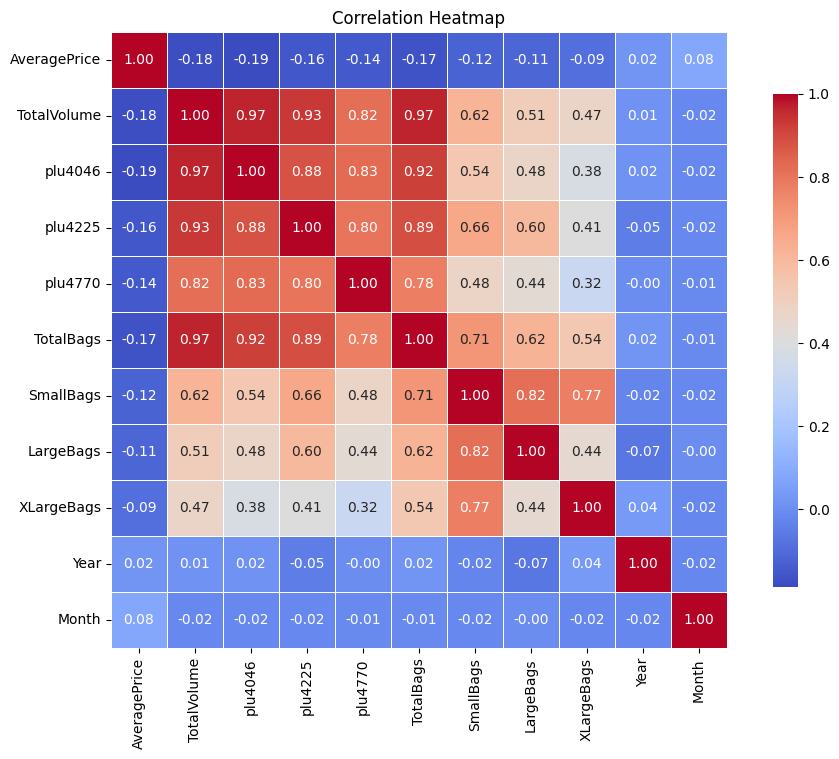

In [58]:
# Select relevant columns
columns_of_interest = [
    'AveragePrice',
    'TotalVolume',
    'plu4046',
    'plu4225',
    'plu4770',
    'TotalBags',
    'SmallBags',
    'LargeBags',
    'XLargeBags',
    'Year',
    'Month'
]

# Filter the DataFrame
filtered_df = df_clean[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = filtered_df.corr()

# Display the correlation matrix
# Create a heatmap
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8}, linewidths=0.5)

# Set the title and show the plot
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap visually displays the relationships between different variables in a dataset, using color intensity and the direction of the squares to indicate the strength and type of correlation. The heatmap reveals several strong positive correlations, marked by bright red squares, between volume and size-related variables. This means that as the volume of avocados increases, the number of bags, small bags, large bags, and extra-large bags also tends to increase. Conversely, the average price shows a weak negative correlation with most other variables, suggesting that when the price goes up, the total volume, number of bags, and sizes slightly decrease. Additionally, there are weak correlations, indicated by lighter colors, between variables such as year and month and others, signifying that these factors have minimal impact on the overall relationships. The negative correlation between price and volume indicates that businesses should carefully consider their pricing strategies to balance revenue and market share. The strong positive correlations between volume and size variables underscore the importance of effective supply chain management to maintain adequate inventory levels for different avocado sizes. Finally, the weak correlations between year and month and other variables imply that seasonal factors may have a limited effect on the overall relationships.

2. Violin Plot for Average Price by type


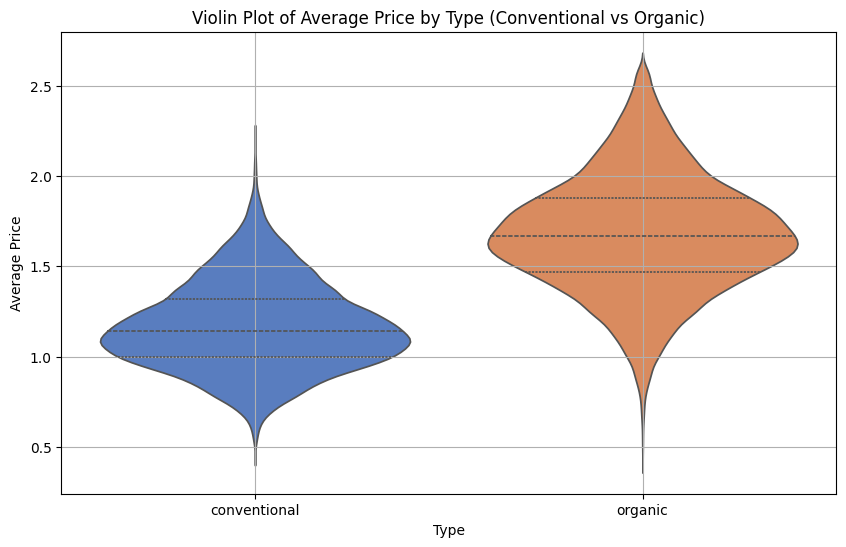

In [59]:
# Violin Plot for Average Price
plt.figure(figsize=(10, 6))
sns.violinplot(x='type', y='AveragePrice', data=df_clean, inner='quartile', palette='muted')
plt.title('Violin Plot of Average Price by Type (Conventional vs Organic)')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


The violin plot displays the distribution of average prices for conventional and organic products. There are clear differences in the price distributions between the two types. The plot for organic products is shifted to the right, indicating that they generally have higher average prices than conventional products. The density of the plots shows how data points are spread across different price levels, with the organic plot showing a slightly wider spread, suggesting more variation in organic product prices. The median price, represented by a horizontal line within each violin, is noticeably higher for organic products compared to conventional ones.

This pricing difference indicates that organic products are typically more expensive, likely due to the higher costs involved in organic production methods. Consumers might view organic products as higher quality or healthier, which could justify the premium price. The distinct price distributions also suggest that there are different market segments for conventional and organic products, catering to consumers with varying sensitivities to price.

3. Total Sales Volume by Region



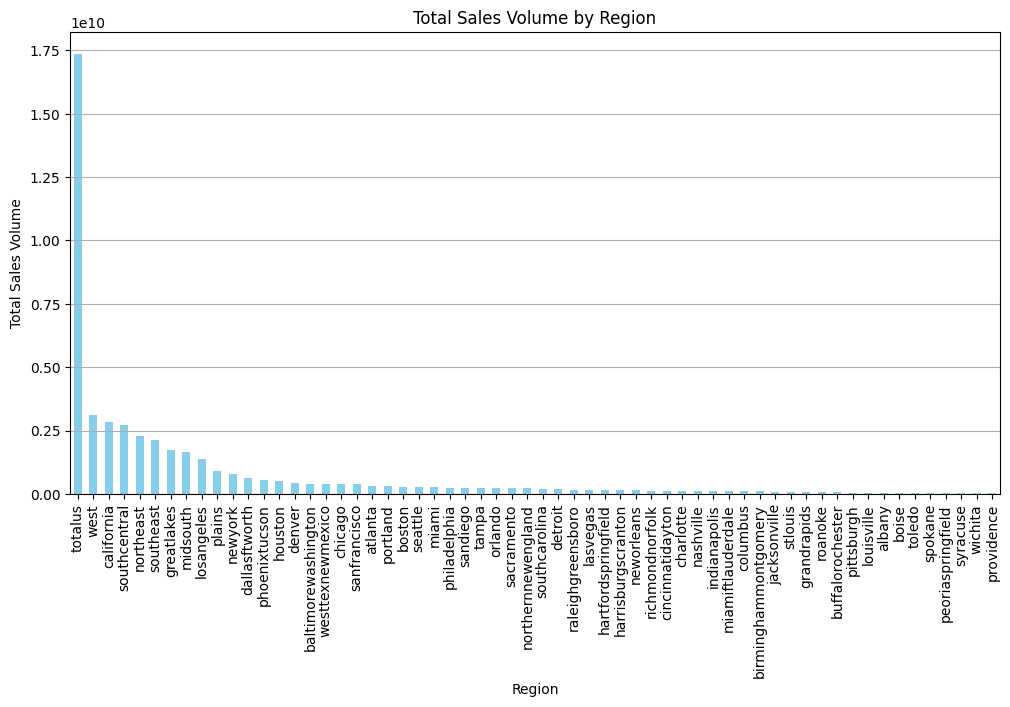

In [60]:
# Bar Chart for Total Sales Volume by Region
plt.figure(figsize=(12, 6))
total_sales_by_region = df_clean.groupby('region')['TotalVolume'].sum().sort_values(ascending=False)
total_sales_by_region.plot(kind='bar', color='skyblue')
plt.title('Total Sales Volume by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Volume')
plt.grid(axis='y')
plt.show()


The bar chart displays the total sales volume across various regions. There is a noticeable disparity in sales volume, with a few regions contributing a large portion of the total sales, while others have relatively low volumes. The "totalus" region leads with the highest sales, followed by the "west" and "southeast" regions, which are the dominant markets. In contrast, several regions show very low sales, creating a long tail in the chart.

This concentration of sales in a few regions indicates that the market is not evenly distributed. Businesses should focus on these dominant regions to maximize sales potential. However, there may also be growth opportunities in the regions with lower sales volumes. To effectively meet customer needs, businesses might need to develop strategies tailored to the specific preferences of different areas.

4. Monthly Sales Volume

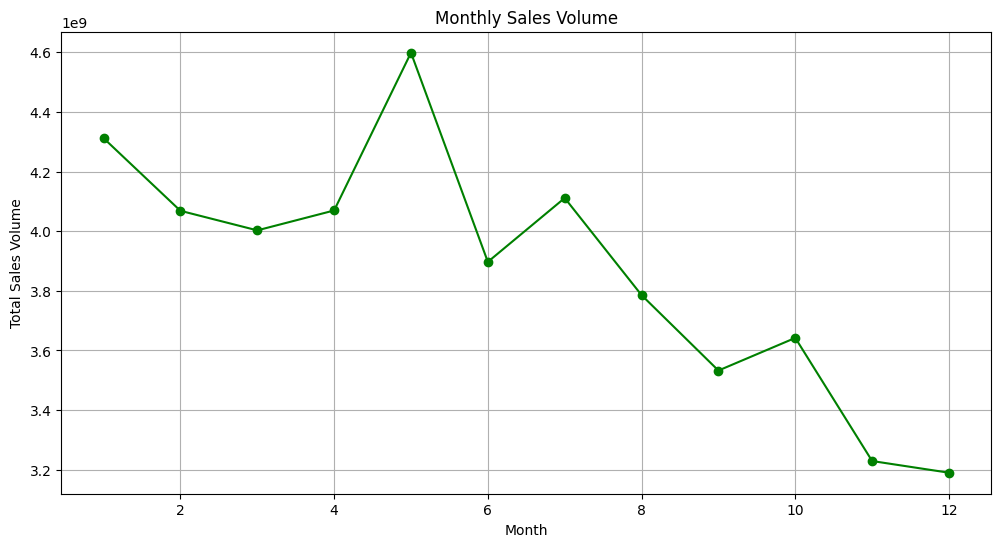

In [61]:
# Line Chart for Monthly Sales Volume
plt.figure(figsize=(12, 6))
monthly_sales_volume = df_clean.groupby('Month')['TotalVolume'].sum()
monthly_sales_volume.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Volume')
plt.xlabel('Month')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=0)
plt.grid()
plt.show()



The line graph shows the monthly sales volume over a year. The sales volume fluctuates a lot throughout the year, with noticeable peaks and troughs in different months. There appears to be some seasonality in the data, with higher sales volumes during certain months and lower sales volumes in others. Although there are these fluctuations, there is no clear upward or downward trend in the overall sales volume over the year.

5. Relationship between Average Price & Total Volume

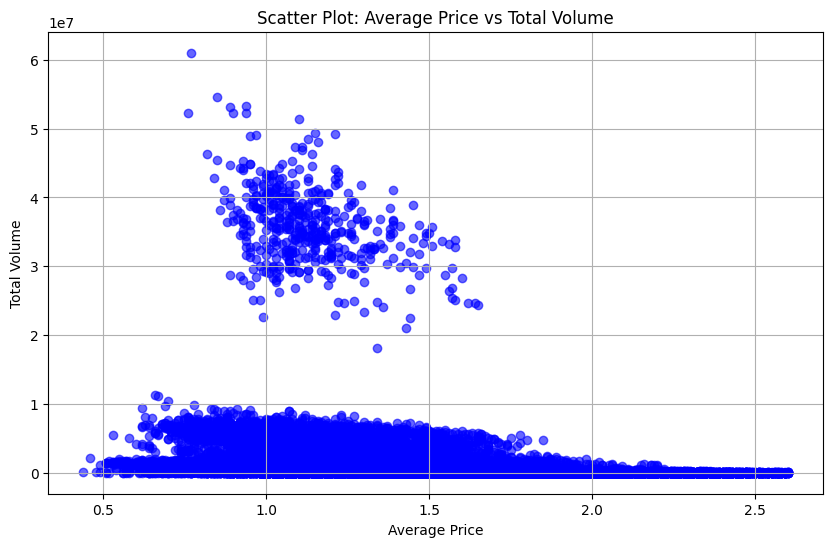

In [62]:
# Scatter Plot for Average Price vs Total Volume
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['AveragePrice'], df_clean['TotalVolume'], color='blue', alpha=0.6)
plt.title('Scatter Plot: Average Price vs Total Volume')
plt.xlabel('Average Price')
plt.ylabel('Total Volume')
plt.grid(True)
plt.show()


The scatter plot shows the relationship between the average price and total volume of a product or service. There is a negative correlation, meaning that when the average price goes up, the total volume tends to go down. The data points are grouped in certain areas of the plot, which may indicate different market segments or pricing strategies. There are also a few outliers—data points that are much different from the rest—which could be caused by unusual events like promotions, supply chain issues, or changes in what consumers want.

This negative correlation suggests that the product or service is sensitive to price. Consumers are more likely to buy it when the price is lower. Businesses need to think carefully about their pricing strategies to balance making money and keeping market share. Lower prices might increase sales volume, but they could also lower profit margins. The clustering of data points hints at different market segments with different price sensitivities, which means businesses could adjust their pricing strategies to target specific groups.

6. Sales of Different Avocado Sizes

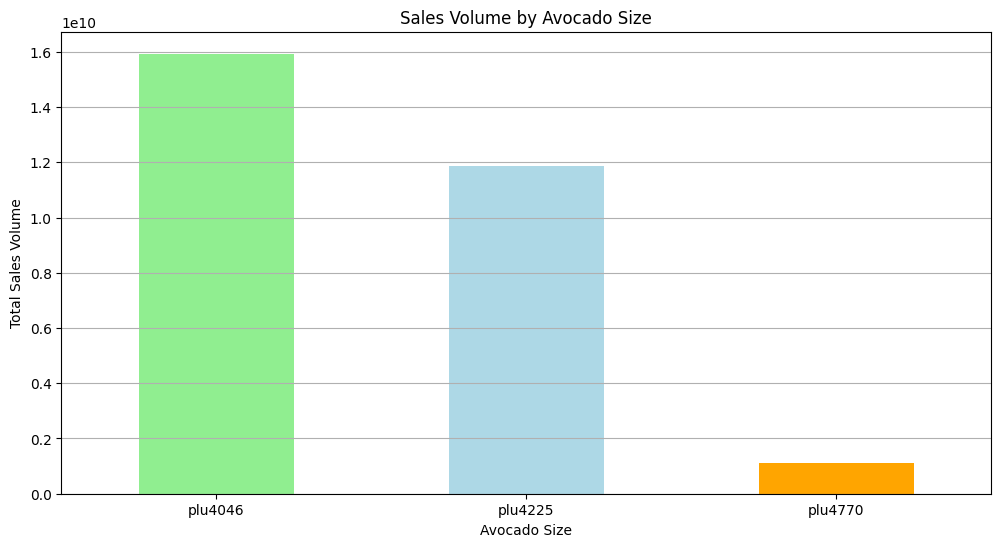

In [63]:
# Bar Chart for Sales of Different Avocado Sizes
plt.figure(figsize=(12, 6))

# Group by PLU and sum the Total Volume
sales_by_avocado_size = df_clean.groupby('type')[['plu4046', 'plu4225', 'plu4770']].sum()  # Adjust based on your actual column names
sales_by_avocado_size = sales_by_avocado_size[['plu4046', 'plu4225', 'plu4770']].sum()

# Plotting the data
sales_by_avocado_size.plot(kind='bar', color=['lightgreen', 'lightblue', 'orange'])
plt.title('Sales Volume by Avocado Size')
plt.xlabel('Avocado Size')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()




The bar chart shows the total sales volume for three avocado sizes: plu4046, plu4225, and plu4770. The plu4046 size has the highest sales, making it the most popular among consumers. There is a big difference in sales between plu4046 and the other two sizes, with plu4225 and plu4770 selling much less. This suggests that people prefer the plu4046 size, likely because of its taste, texture, or how they plan to use it. The strong sales for plu4046 indicate high market demand for this size, so retailers and suppliers should focus on stocking and promoting it. To understand why consumers like plu4046 so much, more analysis is needed. This could include looking at taste tests and customer feedback. In conclusion, the chart shows that plu4046 is significantly more popular than plu4225 and plu4770, highlighting the need for further study on what drives these preferences to improve product offerings.

7. Sales Distribution: Conventional vs Organic

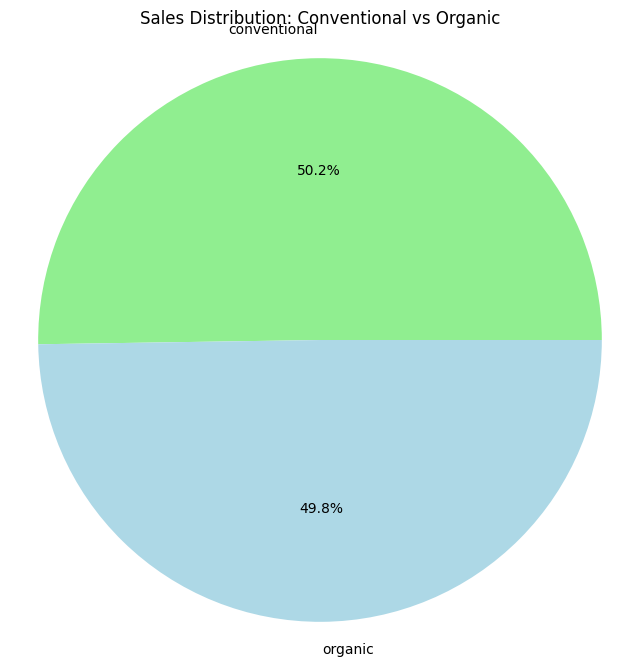

In [64]:
# Pie Chart for Conventional vs. Organic Sales
plt.figure(figsize=(8, 8))
sales_by_type = df_clean['type'].value_counts()
plt.pie(sales_by_type, labels=sales_by_type.index, autopct='%1.1f%%', colors=['lightgreen', 'lightblue'])
plt.title('Sales Distribution: Conventional vs Organic')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()


The pie chart shows how sales are divided between conventional and organic products. The distribution is almost equal, with conventional products making up 50.2% of sales and organic products at 49.8%. This indicates that both types of products have a significant market share, highlighting a strong demand for each.

This equal distribution suggests that consumers have varied preferences and are not strictly choosing one type of product over the other. The market competition for both conventional and organic products is likely fierce, as each segment holds a substantial share of the market. Additionally, there may be growth opportunities in both areas, as consumer preferences and market trends continue to change.

8. Total Sales Volume Over Time (2015 - 2023)

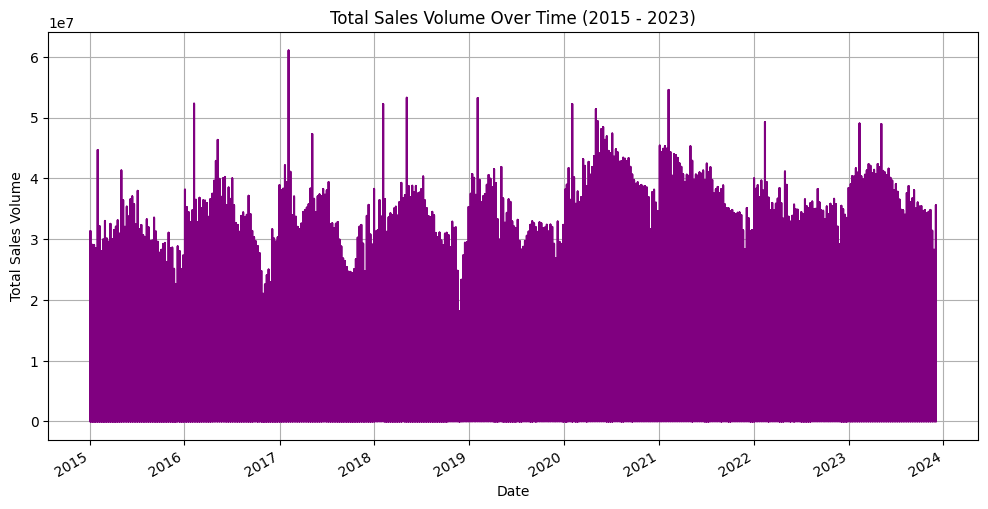

In [65]:
# Ensure 'Date' is in datetime format
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')

# Set 'Date' as the index
df_clean.set_index('Date', inplace=True)

# Time Series Line Chart for Total Sales Volume Over Time
plt.figure(figsize=(12, 6))
df_clean['TotalVolume'].plot(kind='line', color='purple')
plt.title('Total Sales Volume Over Time (2015 - 2023)')
plt.xlabel('Date')
plt.ylabel('Total Sales Volume')
plt.grid()
plt.show()


The graph shows the total sales volume from 2015 to 2023, covering nine years. The data likely represents daily or weekly sales, as there are many data points. Overall, there is an upward trend in sales volume, indicating growth over time, but there are also many ups and downs throughout the years. The data suggests some seasonality, with regular peaks and lows at certain times of the year, which may be influenced by holidays, promotions, or seasonal demand.

Additionally, there are several outliers/data points that stand out from the overall trend possibly caused by unusual events like economic downturns, natural disasters, or major product launches. There are periods of rapid growth followed by slower growth or even declines, showing that the market is dynamic and affected by various factors.